In [1]:
import os

os.sys.path.append(os.path.join(os.getcwd(), "../../.."))
from charts.cohen import plot_cohen_kappa
from models.LLMOutput import ConfidenceType
from models.Metrics import AverageMetricEnum
from utils.helpers import print_prompts
from metrics.run import gather_data_for_run_ids
from charts.calibration import plot_confidence_calibration_curve
from metrics.agreement.krippendorff import compute_krippendorff_alpha
from charts.performance import (
    plot_precision,
    plot_recall,
    plot_f1_score,
    plot_support_counts,
    plot_precision_heatmap,
    plot_recall_heatmap,
    plot_f1_score_heatmap,
)
from charts.performance import (
    plot_average_precision,
    plot_average_recall,
    plot_average_f1_score
)
from metrics.results_analyzer import ResultsAnalyzer, visualize_results
from metrics.llm.statistics import do_test, get_tests_metrics_dict

# Analyzing results for experience #6

In [2]:
RUN_IDS = [
    # Vanilla
    "6710d37b06025a5fa3afa1e3", # VIII
    "6710d388cb412f9c04d77e78", # IX
    "6710d38a2554ae537bae9c5a", # X
    "6710d38c825266184c27297d", # XI
    "6710d82582bc4b9d2c8b2361", # XII
    "6710d8265ec9779d742f7540", # XIII
    "6710d827f8f860b93efa1f38", # XIV
    "6710d828cfc0620e7f3c1ee2", # XV
]
OUTPUT_PATH = "images/experience_6/metrics/stratified"

RUN_INFOS = gather_data_for_run_ids(RUN_IDS)

The first eight runs are each based on PQs sampled from the dataset for each parliamentary term (n=1500).
Here is the themes distribution for the batch used in the experiment :

## Support

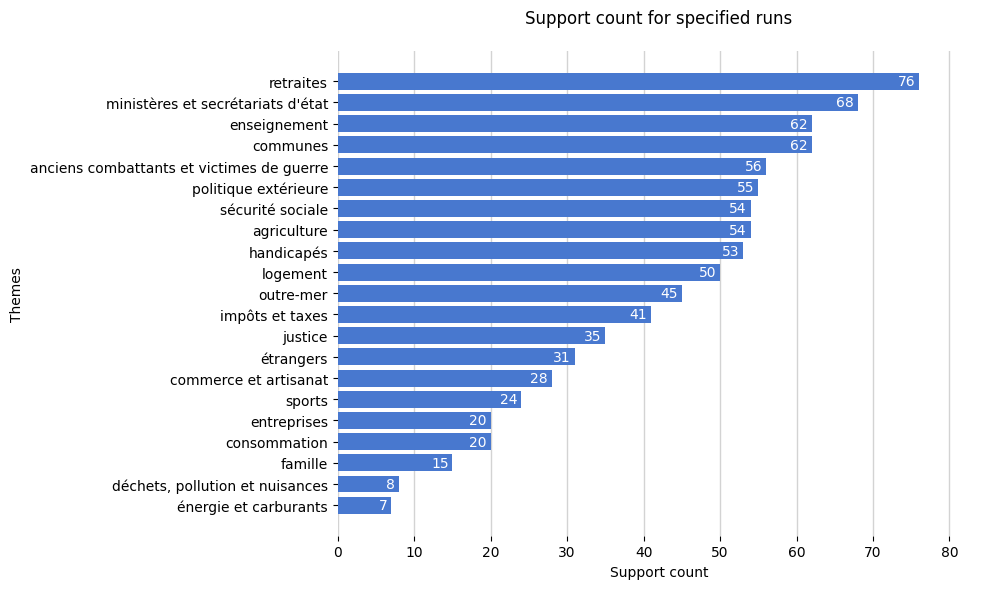

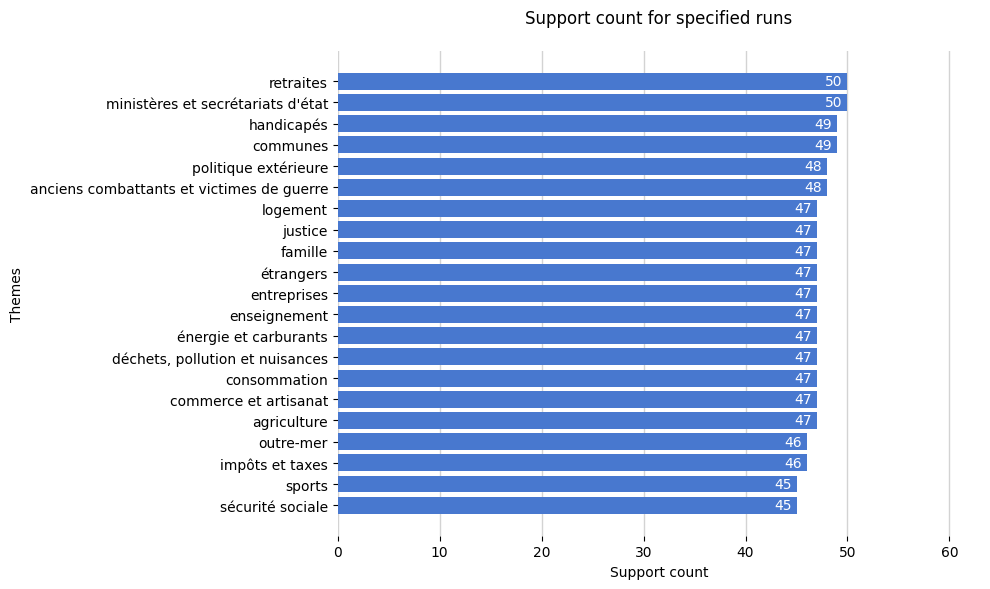

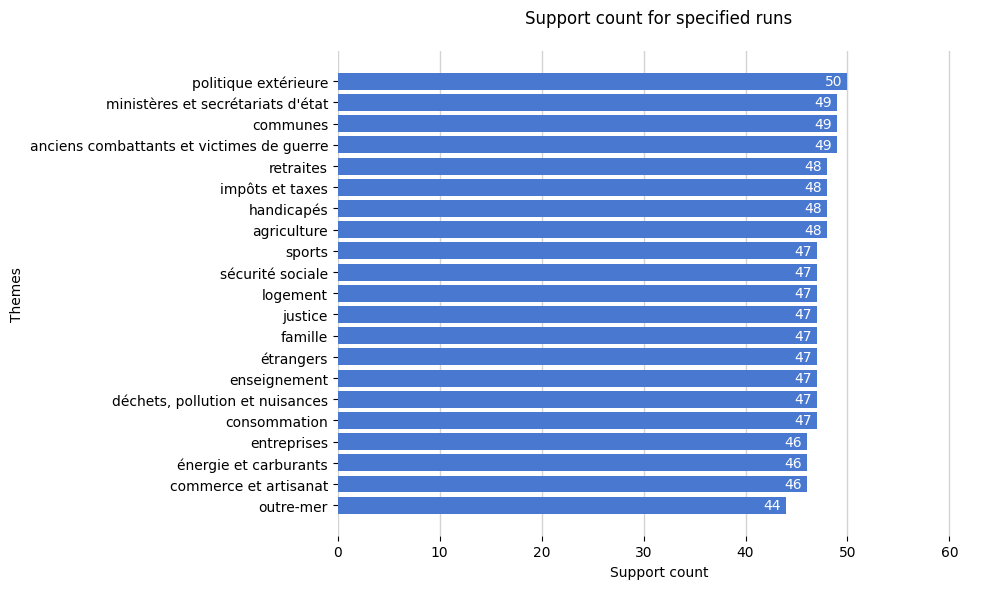

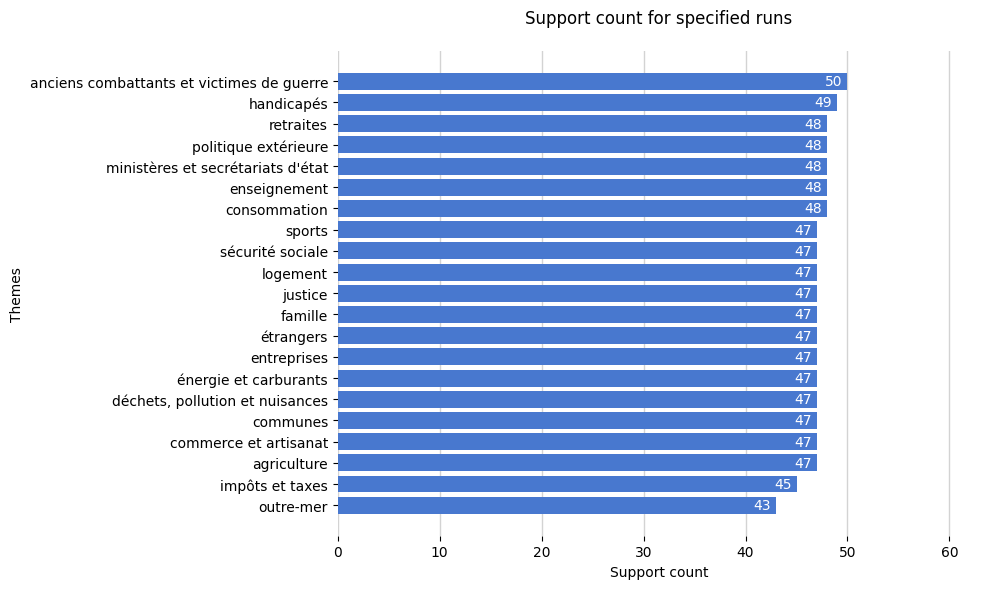

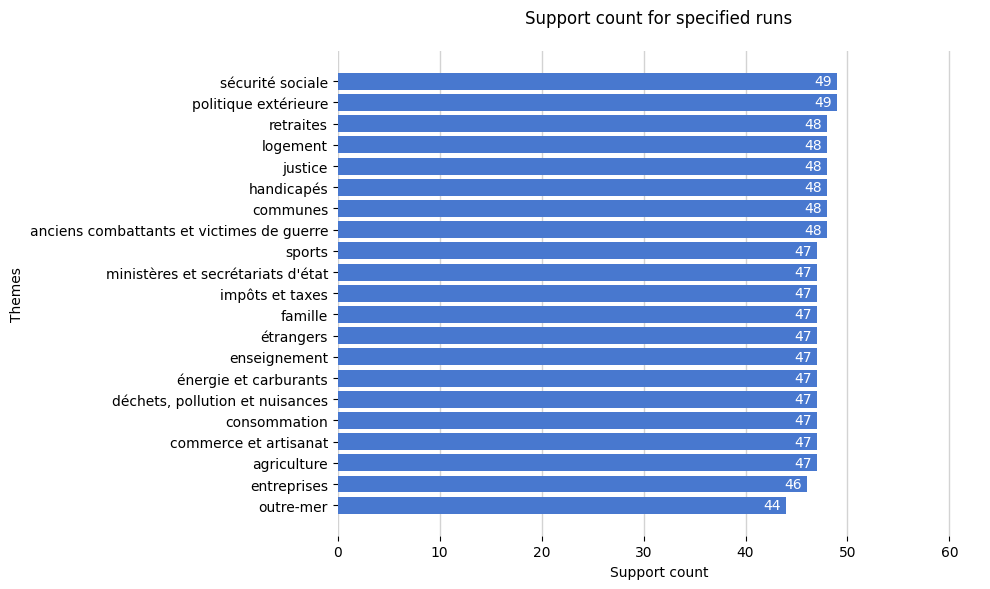

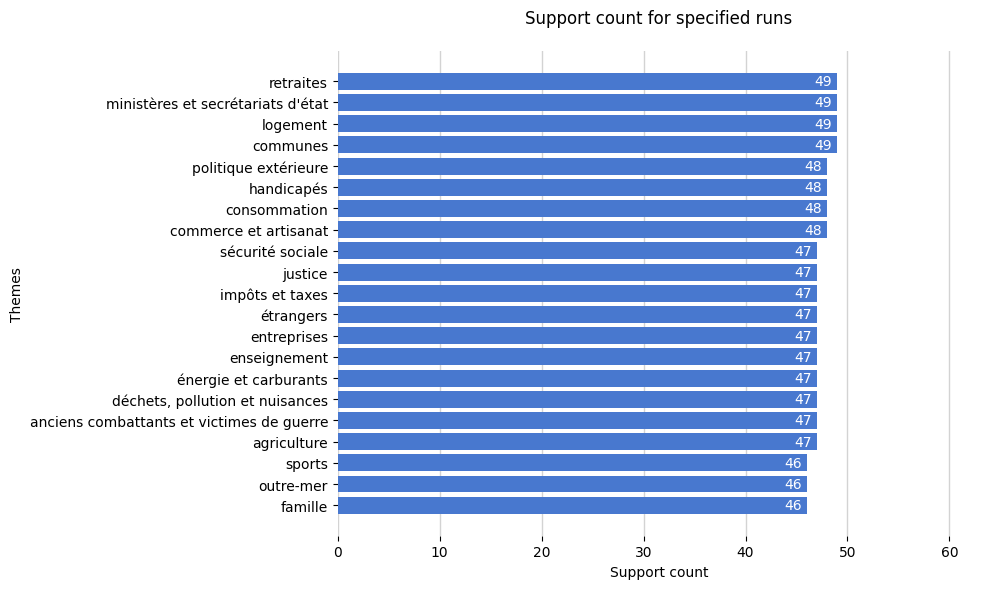

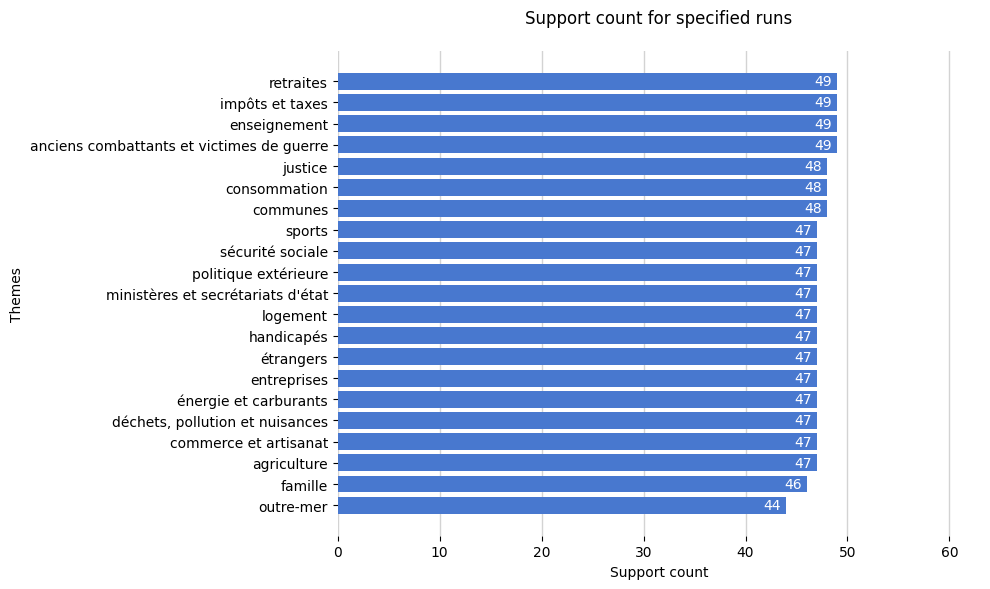

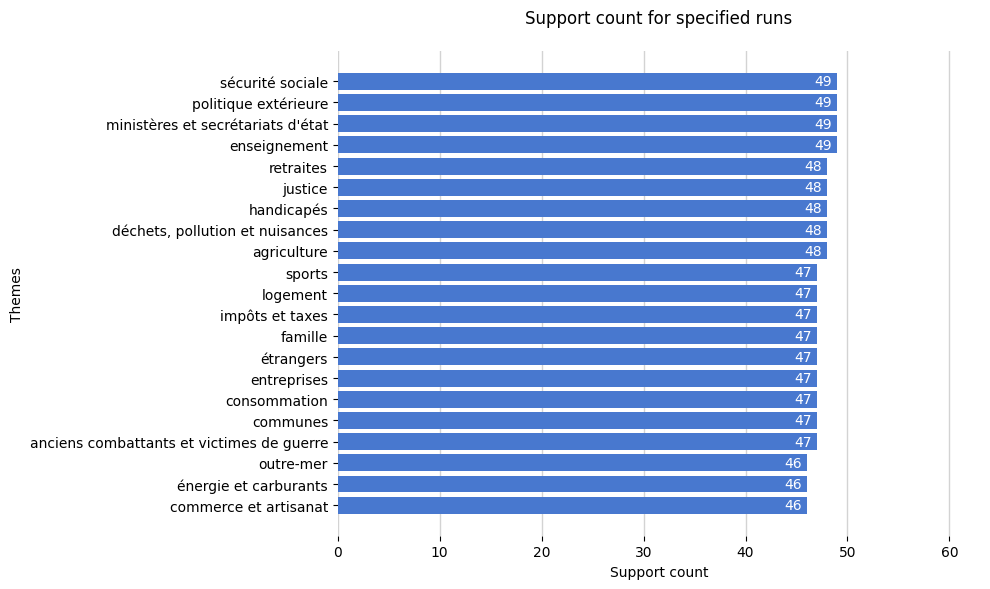

In [3]:
plot_support_counts(RUN_IDS, save_folder=OUTPUT_PATH)

Using this batch, we tried 2 different prompting strategy (all of them in french) :
- zero-shot
- zero-shot verbalized confidence

We only used one temperature setup for this run :
- 0.0

The following is the analysis for each prompting strategy used for experience #6. In that experiment, we mainly focus on how "collectivités locales" vs. "collectivités territoriales" are labeled properly and which confidence levels are registered on that task.

Our hypothesis is that contemporary categories ("collectivités territoriales") should have higher performance score than native ones ("collectivités locales").


## Zero-shot Vanilla (VIII)

In [4]:
print_prompts(RUN_INFOS[0]["prompts"])

system: Ton rôle est d'attribuer un thème à une question posée par un député à l'Assemblée nationale française. La liste des thèmes est la suivante :
- retraites
- ministères et secrétariats d'état
- handicapés
- enseignement
- politique extérieure
- agriculture
- logement
- anciens combattants et victimes de guerre
- énergie et carburants
- impôts et taxes
- sécurité sociale
- justice
- entreprises
- outre-mer
- déchets, pollution et nuisances
- communes
- commerce et artisanat
- sports
- consommation
- famille
- étrangers
Ta réponse doit contenir une seule chose: le thème correspondant, par exemple `retraites` ou `ministères et secrétariats d'état`. Le thème assigné doit être un des thèmes de la liste fournie. Seuls les thèmes de la liste précédente sont valides.

user: {0}



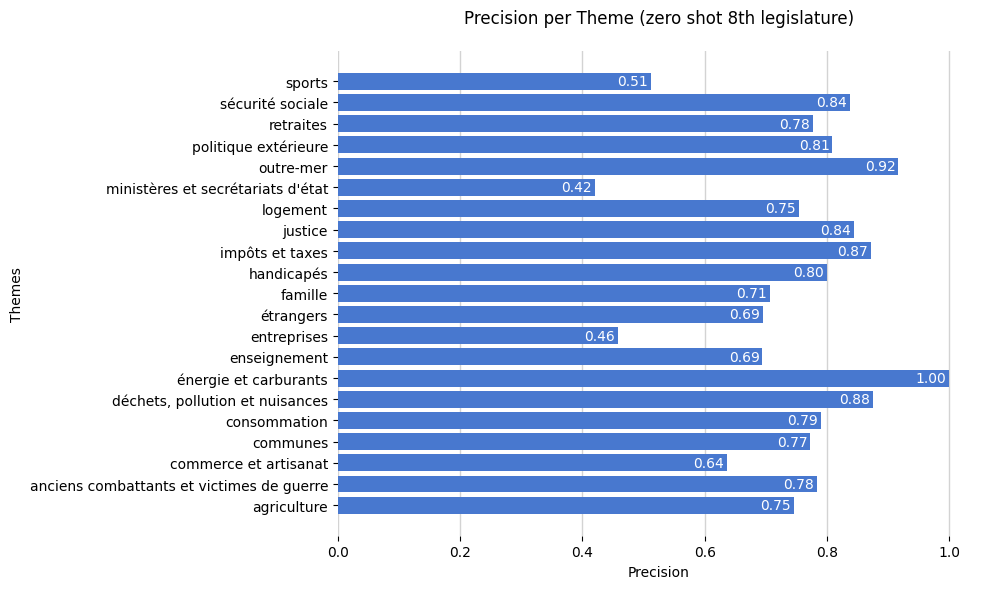

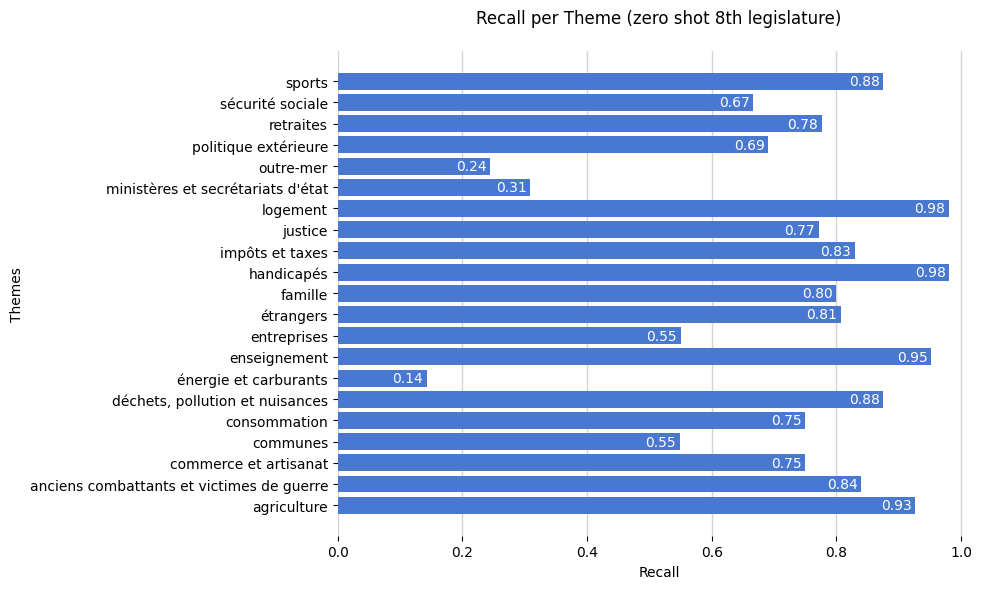

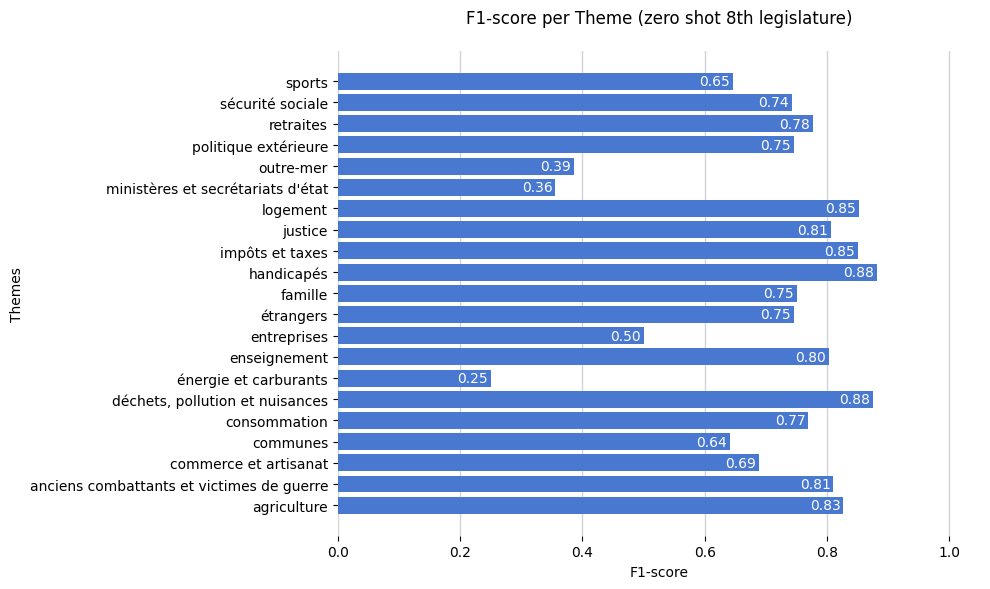

In [5]:
plot_precision(RUN_IDS[0], save_folder=OUTPUT_PATH)
plot_recall(RUN_IDS[0], save_folder=OUTPUT_PATH)
plot_f1_score(RUN_IDS[0], save_folder=OUTPUT_PATH)

## Zero-shot Vanilla (IX)

In [6]:
print_prompts(RUN_INFOS[1]["prompts"])

system: Ton rôle est d'attribuer un thème à une question posée par un député à l'Assemblée nationale française. La liste des thèmes est la suivante :
- retraites
- ministères et secrétariats d'état
- handicapés
- enseignement
- politique extérieure
- agriculture
- logement
- anciens combattants et victimes de guerre
- énergie et carburants
- impôts et taxes
- sécurité sociale
- justice
- entreprises
- outre-mer
- déchets, pollution et nuisances
- communes
- commerce et artisanat
- sports
- consommation
- famille
- étrangers
Ta réponse doit contenir une seule chose: le thème correspondant, par exemple `retraites` ou `ministères et secrétariats d'état`. Le thème assigné doit être un des thèmes de la liste fournie. Seuls les thèmes de la liste précédente sont valides.

user: {0}



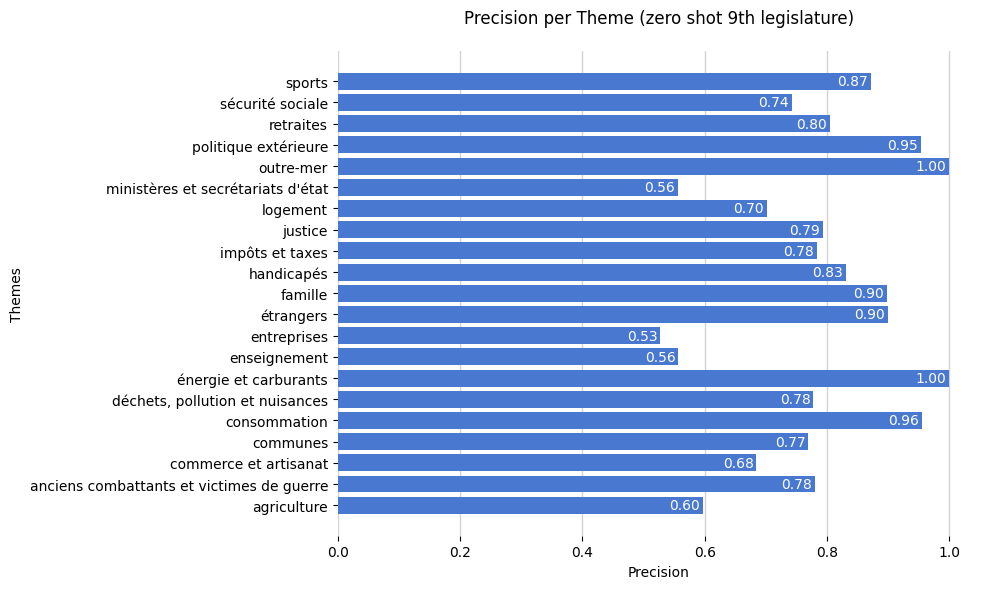

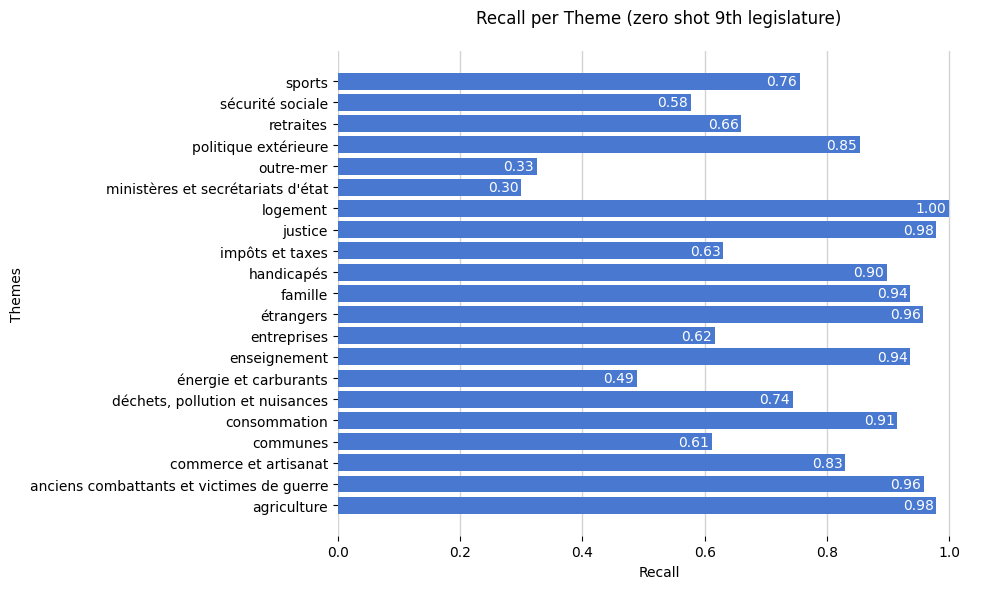

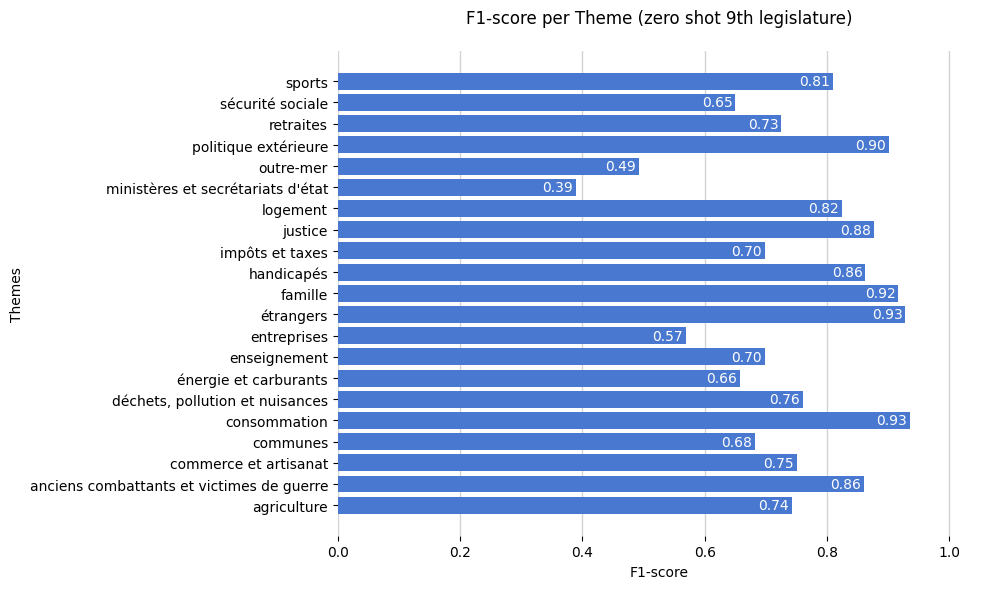

In [7]:
plot_precision(RUN_IDS[1], save_folder=OUTPUT_PATH)
plot_recall(RUN_IDS[1], save_folder=OUTPUT_PATH)
plot_f1_score(RUN_IDS[1], save_folder=OUTPUT_PATH)

## Zero-shot Vanilla (X)

In [8]:
print_prompts(RUN_INFOS[2]["prompts"])

system: Ton rôle est d'attribuer un thème à une question posée par un député à l'Assemblée nationale française. La liste des thèmes est la suivante :
- retraites
- ministères et secrétariats d'état
- handicapés
- enseignement
- politique extérieure
- agriculture
- logement
- anciens combattants et victimes de guerre
- énergie et carburants
- impôts et taxes
- sécurité sociale
- justice
- entreprises
- outre-mer
- déchets, pollution et nuisances
- communes
- commerce et artisanat
- sports
- consommation
- famille
- étrangers
Ta réponse doit contenir une seule chose: le thème correspondant, par exemple `retraites` ou `ministères et secrétariats d'état`. Le thème assigné doit être un des thèmes de la liste fournie. Seuls les thèmes de la liste précédente sont valides.

user: {0}



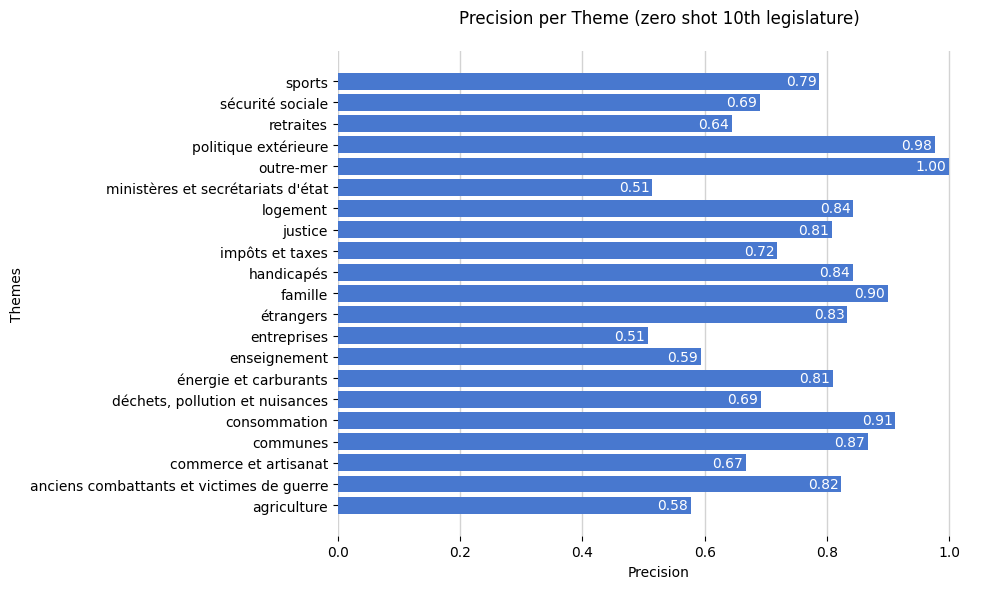

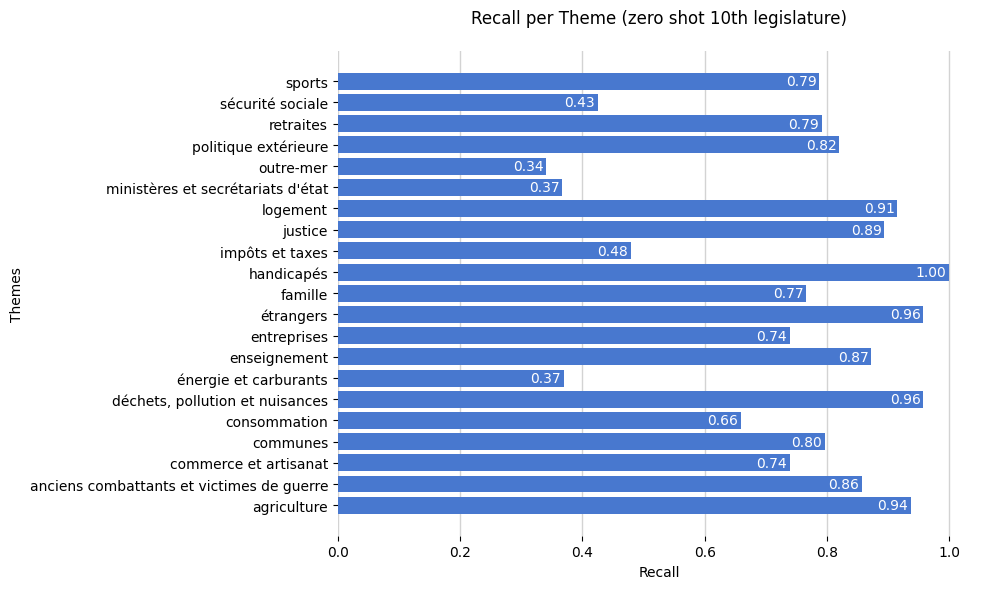

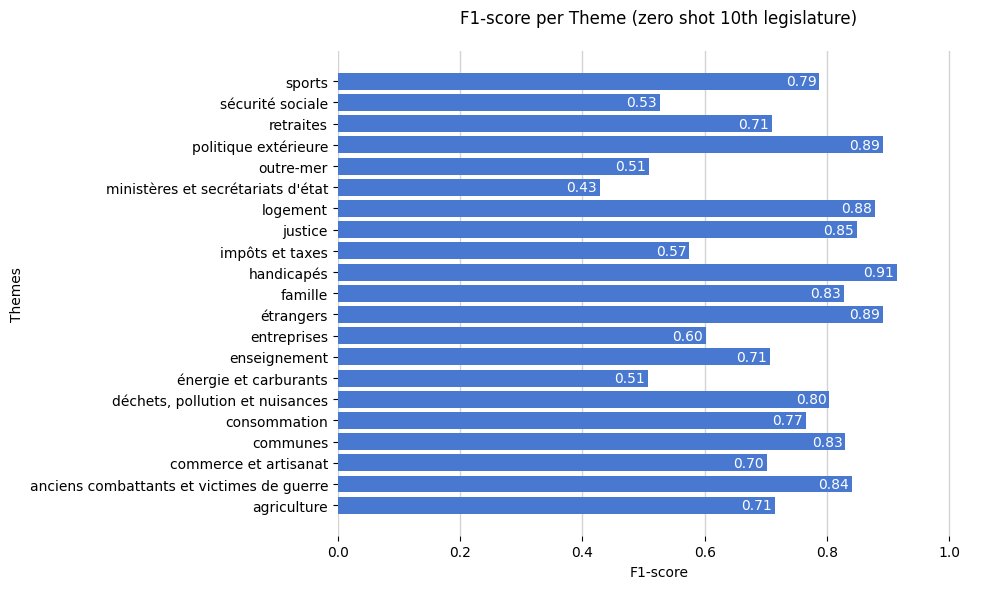

In [9]:
plot_precision(RUN_IDS[2], save_folder=OUTPUT_PATH)
plot_recall(RUN_IDS[2], save_folder=OUTPUT_PATH)
plot_f1_score(RUN_IDS[2], save_folder=OUTPUT_PATH)

## Zero-shot Vanilla (XI)

In [10]:
print_prompts(RUN_INFOS[3]["prompts"])

system: Ton rôle est d'attribuer un thème à une question posée par un député à l'Assemblée nationale française. La liste des thèmes est la suivante :
- retraites
- ministères et secrétariats d'état
- handicapés
- enseignement
- politique extérieure
- agriculture
- logement
- anciens combattants et victimes de guerre
- énergie et carburants
- impôts et taxes
- sécurité sociale
- justice
- entreprises
- outre-mer
- déchets, pollution et nuisances
- communes
- commerce et artisanat
- sports
- consommation
- famille
- étrangers
Ta réponse doit contenir une seule chose: le thème correspondant, par exemple `retraites` ou `ministères et secrétariats d'état`. Le thème assigné doit être un des thèmes de la liste fournie. Seuls les thèmes de la liste précédente sont valides.

user: {0}



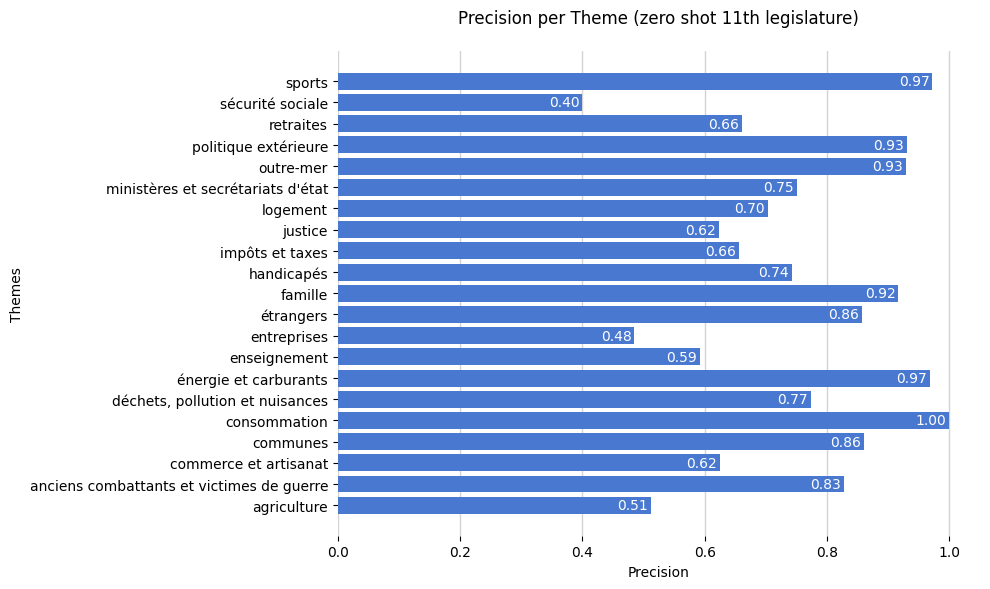

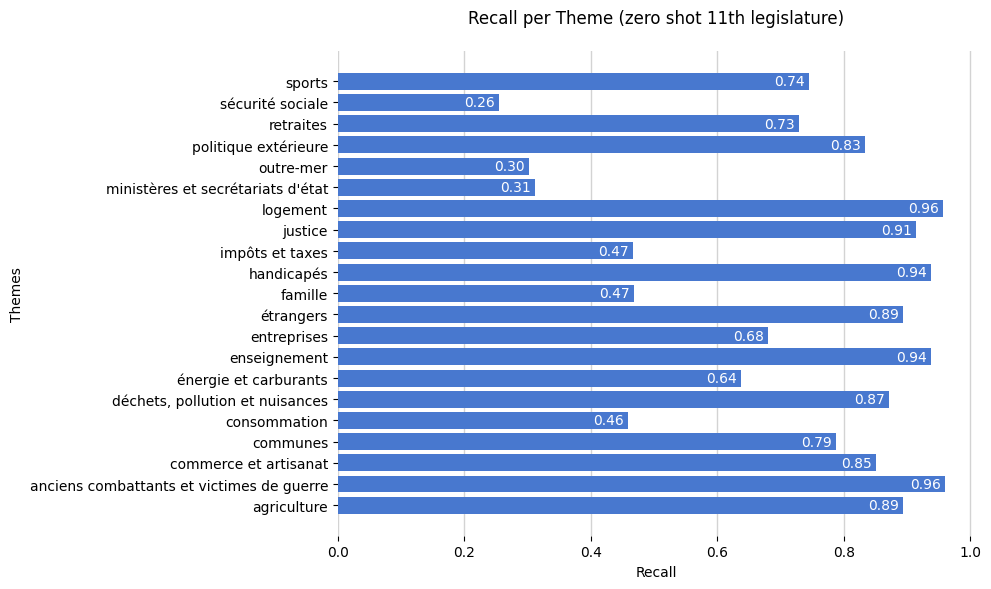

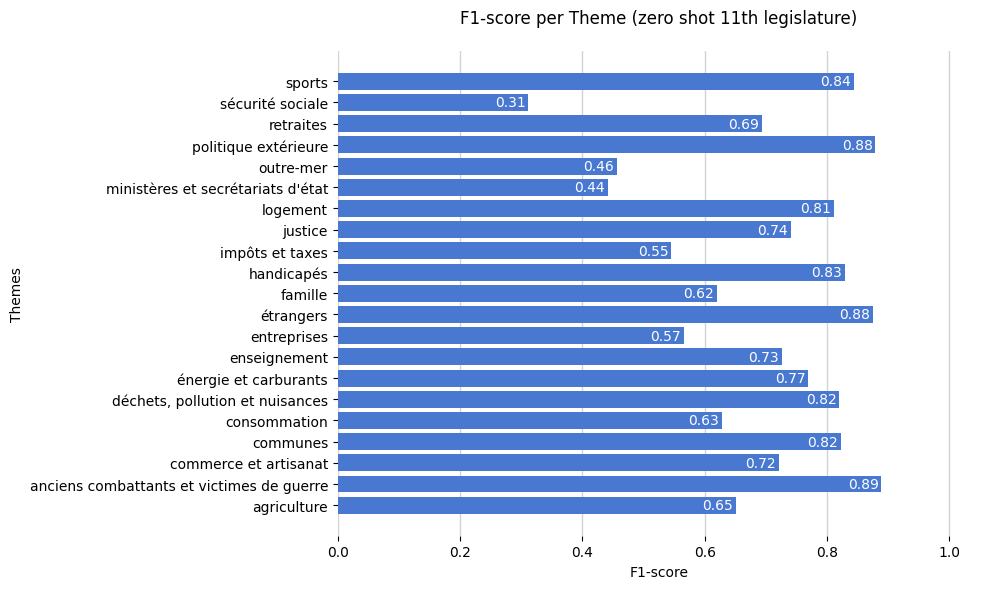

In [11]:
plot_precision(RUN_IDS[3], save_folder=OUTPUT_PATH)
plot_recall(RUN_IDS[3], save_folder=OUTPUT_PATH)
plot_f1_score(RUN_IDS[3], save_folder=OUTPUT_PATH)

## Zero-shot Vanilla (XII)

In [12]:
print_prompts(RUN_INFOS[4]["prompts"])

system: Ton rôle est d'attribuer un thème à une question posée par un député à l'Assemblée nationale française. La liste des thèmes est la suivante :
- retraites
- ministères et secrétariats d'état
- handicapés
- enseignement
- politique extérieure
- agriculture
- logement
- anciens combattants et victimes de guerre
- énergie et carburants
- impôts et taxes
- sécurité sociale
- justice
- entreprises
- outre-mer
- déchets, pollution et nuisances
- communes
- commerce et artisanat
- sports
- consommation
- famille
- étrangers
Ta réponse doit contenir une seule chose: le thème correspondant, par exemple `retraites` ou `ministères et secrétariats d'état`. Le thème assigné doit être un des thèmes de la liste fournie. Seuls les thèmes de la liste précédente sont valides.

user: {0}



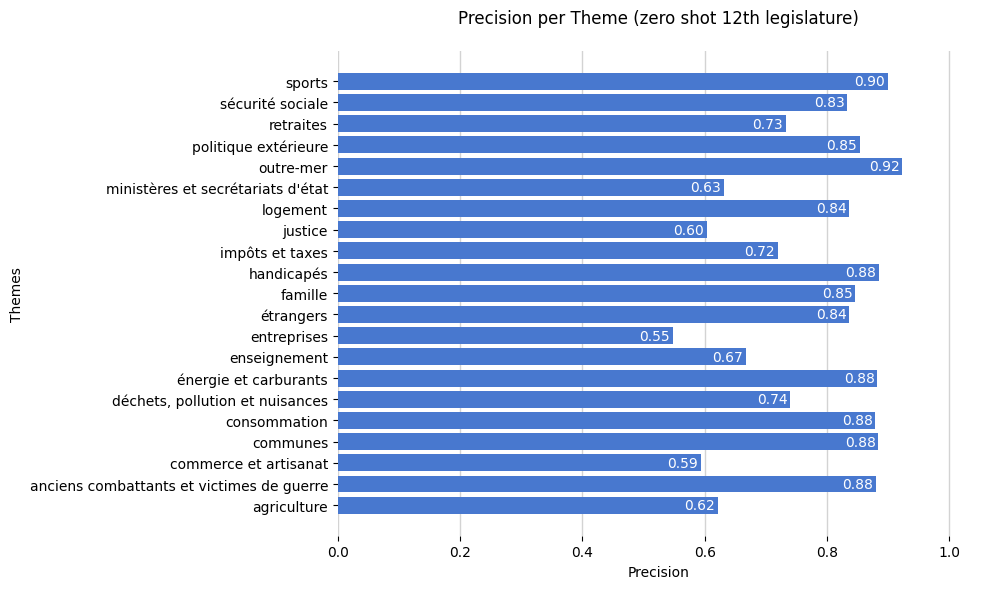

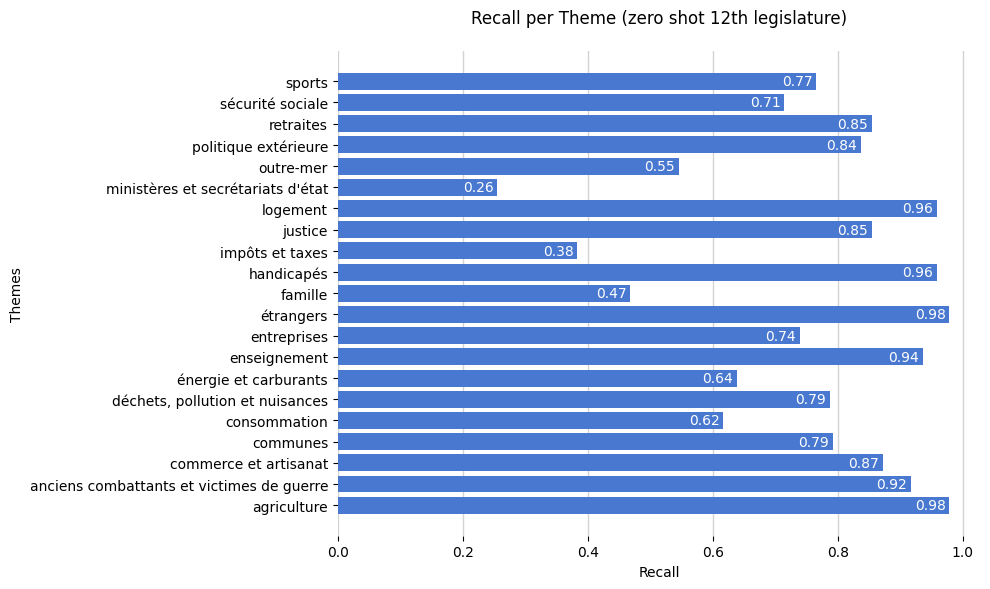

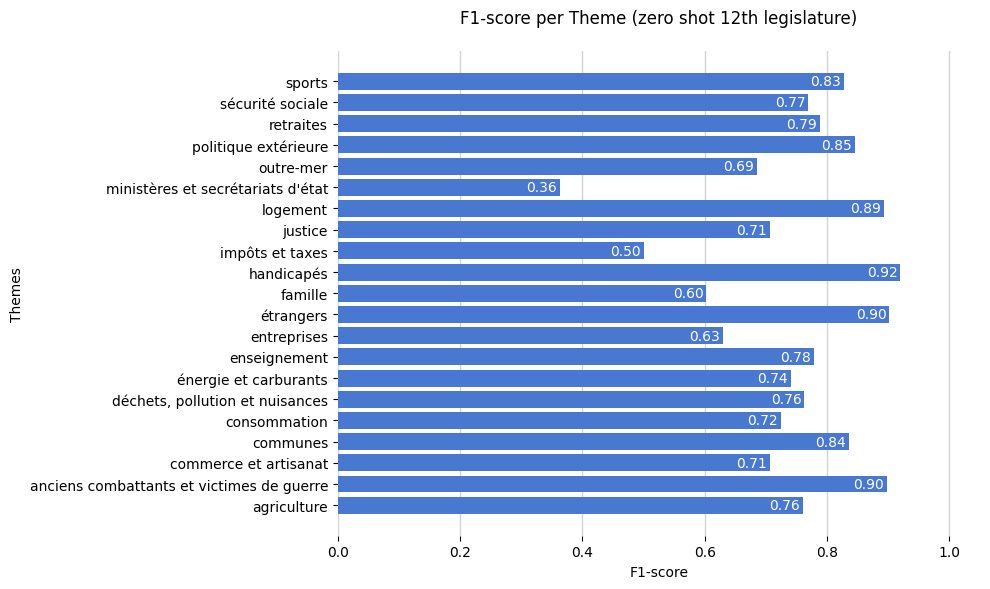

In [13]:
plot_precision(RUN_IDS[4], save_folder=OUTPUT_PATH)
plot_recall(RUN_IDS[4], save_folder=OUTPUT_PATH)
plot_f1_score(RUN_IDS[4], save_folder=OUTPUT_PATH)

## Zero-shot Vanilla (XIII)

system: Ton rôle est d'attribuer un thème à une question posée par un député à l'Assemblée nationale française. La liste des thèmes est la suivante :
- retraites
- ministères et secrétariats d'état
- handicapés
- enseignement
- politique extérieure
- agriculture
- logement
- anciens combattants et victimes de guerre
- énergie et carburants
- impôts et taxes
- sécurité sociale
- justice
- entreprises
- outre-mer
- déchets, pollution et nuisances
- communes
- commerce et artisanat
- sports
- consommation
- famille
- étrangers
Ta réponse doit contenir une seule chose: le thème correspondant, par exemple `retraites` ou `ministères et secrétariats d'état`. Le thème assigné doit être un des thèmes de la liste fournie. Seuls les thèmes de la liste précédente sont valides.

user: {0}



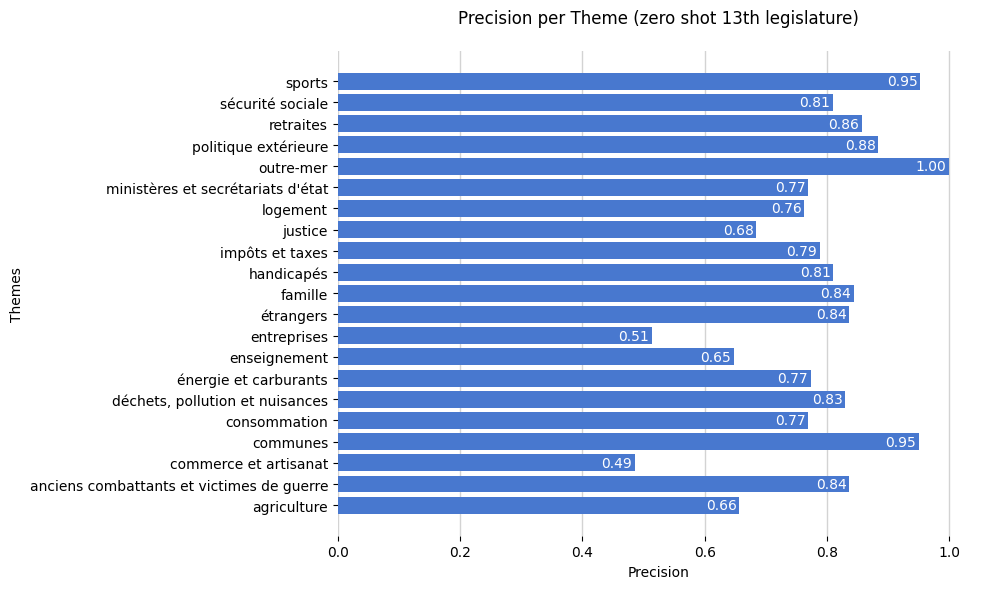

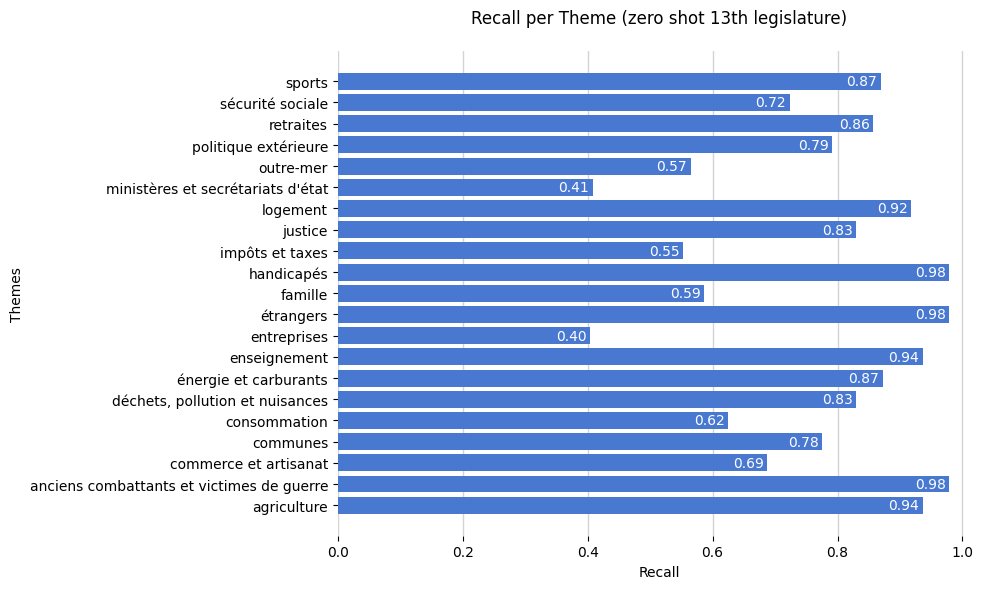

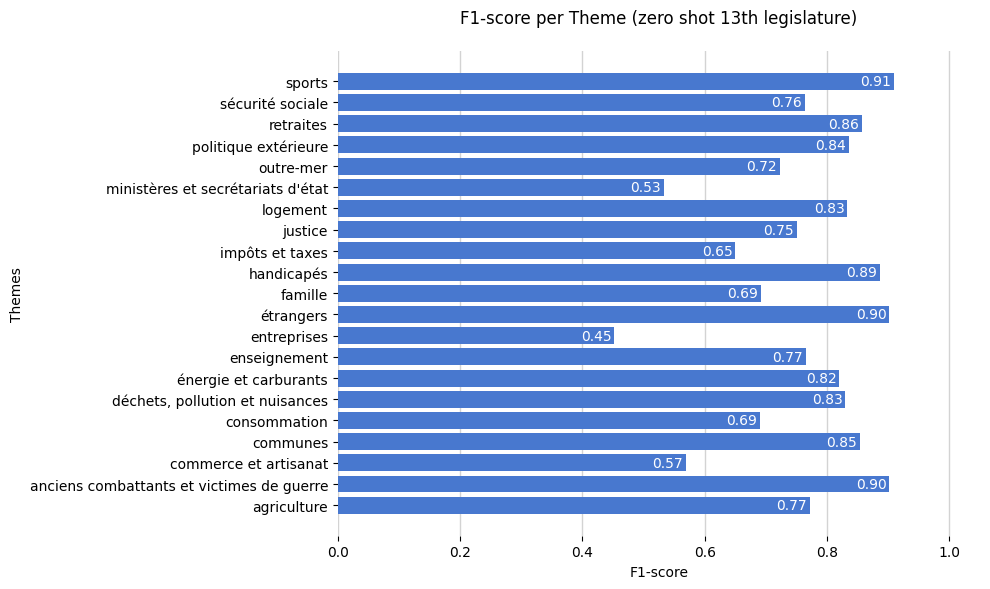

In [14]:
print_prompts(RUN_INFOS[5]["prompts"])
plot_precision(RUN_IDS[5], save_folder=OUTPUT_PATH)
plot_recall(RUN_IDS[5], save_folder=OUTPUT_PATH)
plot_f1_score(RUN_IDS[5], save_folder=OUTPUT_PATH)

## Zero-shot Vanilla (XIV)

system: Ton rôle est d'attribuer un thème à une question posée par un député à l'Assemblée nationale française. La liste des thèmes est la suivante :
- retraites
- ministères et secrétariats d'état
- handicapés
- enseignement
- politique extérieure
- agriculture
- logement
- anciens combattants et victimes de guerre
- énergie et carburants
- impôts et taxes
- sécurité sociale
- justice
- entreprises
- outre-mer
- déchets, pollution et nuisances
- communes
- commerce et artisanat
- sports
- consommation
- famille
- étrangers
Ta réponse doit contenir une seule chose: le thème correspondant, par exemple `retraites` ou `ministères et secrétariats d'état`. Le thème assigné doit être un des thèmes de la liste fournie. Seuls les thèmes de la liste précédente sont valides.

user: {0}



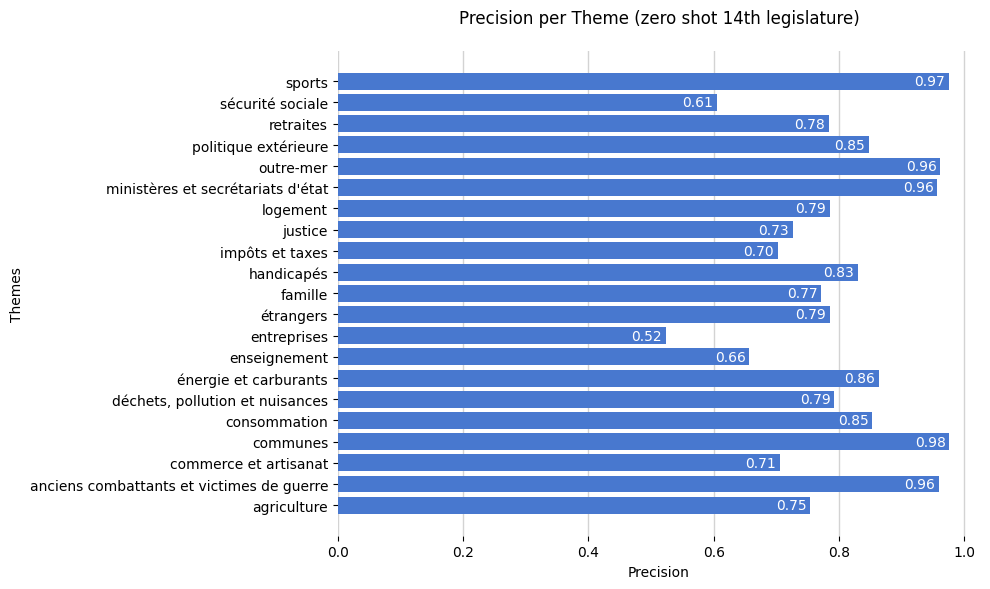

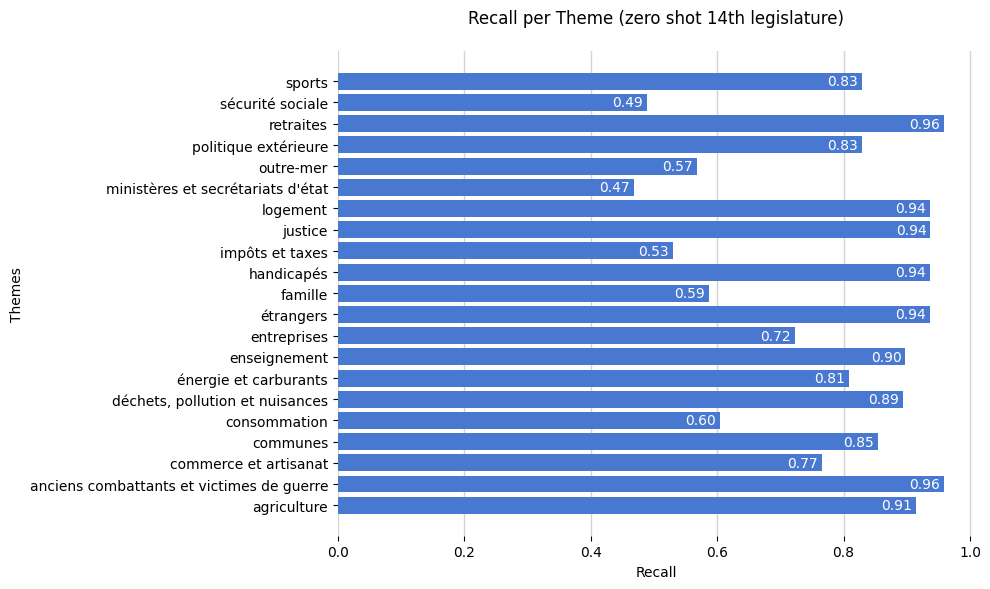

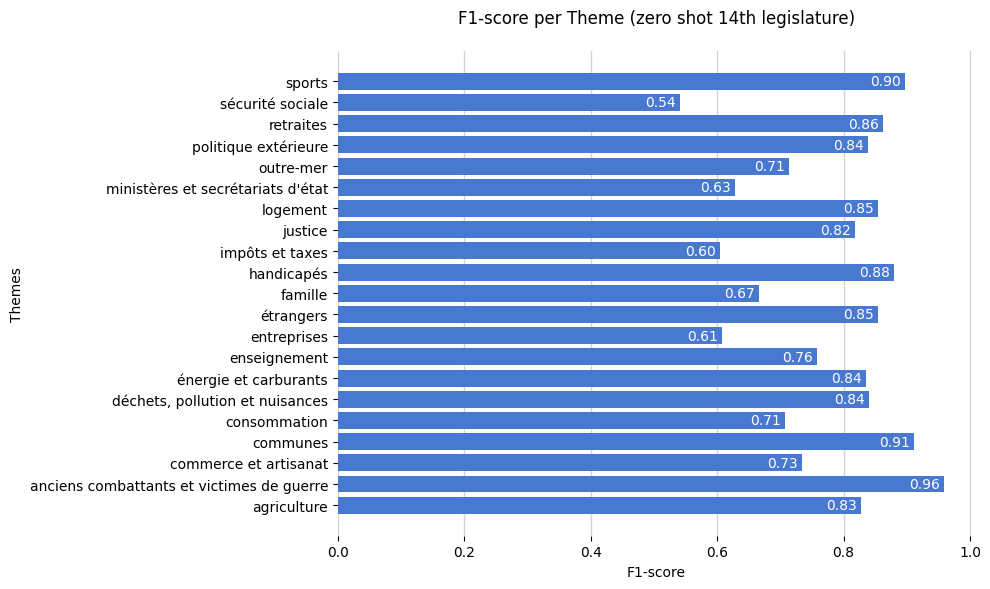

In [15]:
print_prompts(RUN_INFOS[6]["prompts"])
plot_precision(RUN_IDS[6], save_folder=OUTPUT_PATH)
plot_recall(RUN_IDS[6], save_folder=OUTPUT_PATH)
plot_f1_score(RUN_IDS[6], save_folder=OUTPUT_PATH)

## Zero-shot Vanilla (XV)

system: Ton rôle est d'attribuer un thème à une question posée par un député à l'Assemblée nationale française. La liste des thèmes est la suivante :
- retraites
- ministères et secrétariats d'état
- handicapés
- enseignement
- politique extérieure
- agriculture
- logement
- anciens combattants et victimes de guerre
- énergie et carburants
- impôts et taxes
- sécurité sociale
- justice
- entreprises
- outre-mer
- déchets, pollution et nuisances
- communes
- commerce et artisanat
- sports
- consommation
- famille
- étrangers
Ta réponse doit contenir une seule chose: le thème correspondant, par exemple `retraites` ou `ministères et secrétariats d'état`. Le thème assigné doit être un des thèmes de la liste fournie. Seuls les thèmes de la liste précédente sont valides.

user: {0}



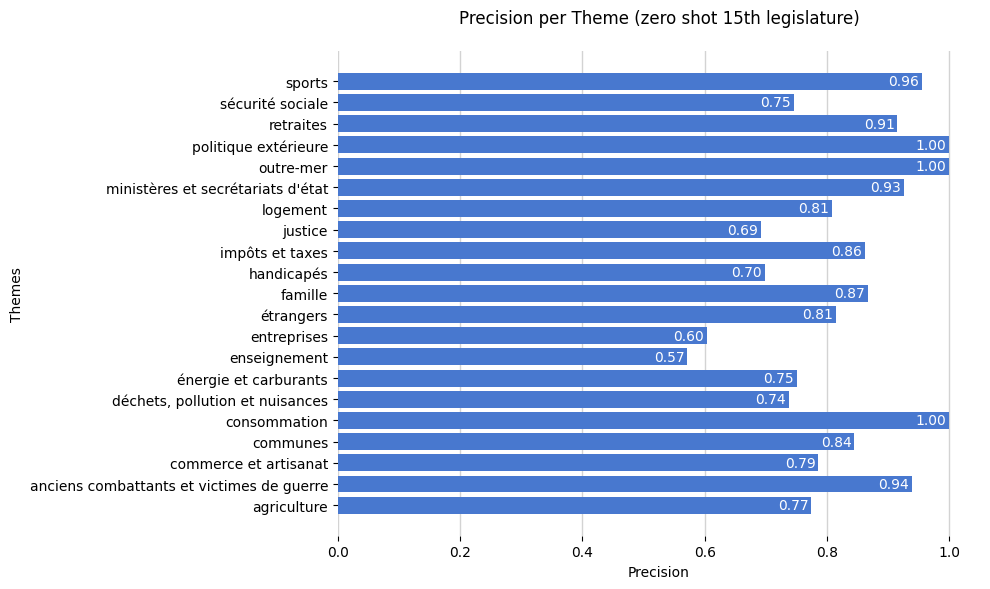

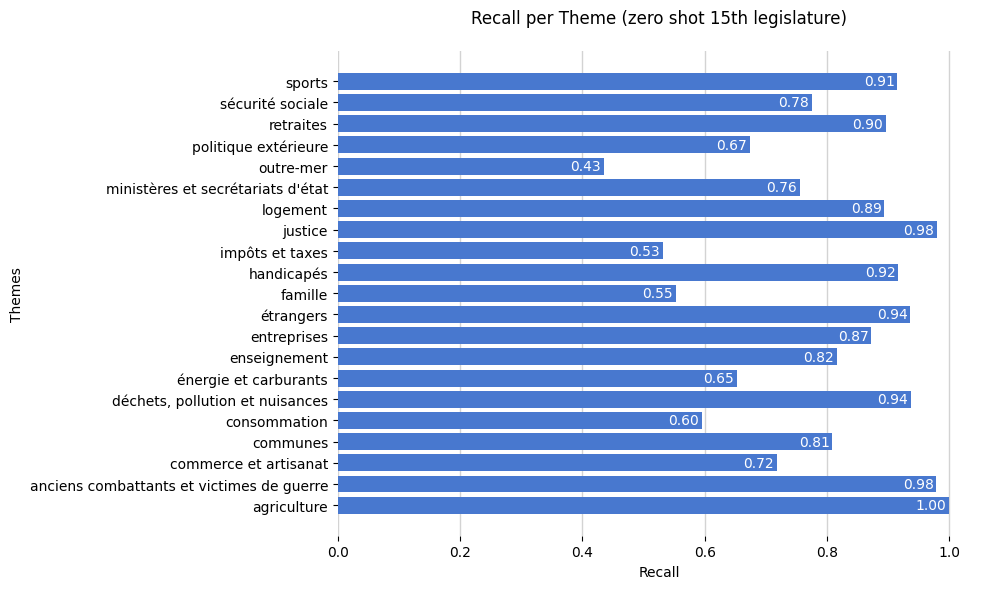

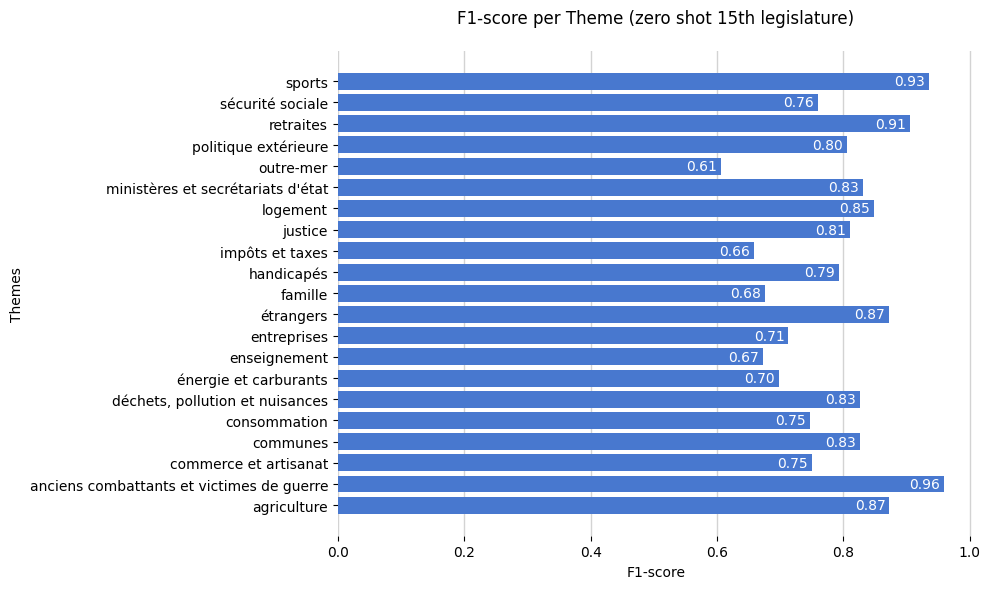

In [16]:
print_prompts(RUN_INFOS[7]["prompts"])
plot_precision(RUN_IDS[7], save_folder=OUTPUT_PATH)
plot_recall(RUN_IDS[7], save_folder=OUTPUT_PATH)
plot_f1_score(RUN_IDS[7], save_folder=OUTPUT_PATH)

In [ ]:
print_prompts(RUN_INFOS[9]["prompts"])
plot_precision(RUN_IDS[9], save_folder=OUTPUT_PATH)
plot_recall(RUN_IDS[9], save_folder=OUTPUT_PATH)
plot_f1_score(RUN_IDS[9], save_folder=OUTPUT_PATH)

In [ ]:
print_prompts(RUN_INFOS[10]["prompts"])
plot_precision(RUN_IDS[10], save_folder=OUTPUT_PATH)
plot_recall(RUN_IDS[10], save_folder=OUTPUT_PATH)
plot_f1_score(RUN_IDS[10], save_folder=OUTPUT_PATH)

In [ ]:
print_prompts(RUN_INFOS[11]["prompts"])
plot_precision(RUN_IDS[11], save_folder=OUTPUT_PATH)
plot_recall(RUN_IDS[11], save_folder=OUTPUT_PATH)
plot_f1_score(RUN_IDS[11], save_folder=OUTPUT_PATH)

In [ ]:
print_prompts(RUN_INFOS[12]["prompts"])
plot_precision(RUN_IDS[12], save_folder=OUTPUT_PATH)
plot_recall(RUN_IDS[12], save_folder=OUTPUT_PATH)
plot_f1_score(RUN_IDS[12], save_folder=OUTPUT_PATH)

In [ ]:
print_prompts(RUN_INFOS[13]["prompts"])
plot_precision(RUN_IDS[13], save_folder=OUTPUT_PATH)
plot_recall(RUN_IDS[13], save_folder=OUTPUT_PATH)
plot_f1_score(RUN_IDS[13], save_folder=OUTPUT_PATH)

In [ ]:
print_prompts(RUN_INFOS[14]["prompts"])
plot_precision(RUN_IDS[14], save_folder=OUTPUT_PATH)
plot_recall(RUN_IDS[14], save_folder=OUTPUT_PATH)
plot_f1_score(RUN_IDS[14], save_folder=OUTPUT_PATH)

(analysis)

## Confidence

(description)


100%|███████████████████████████████████████████████████████████████████████████████| 864/864 [00:00<00:00, 3386.67it/s]


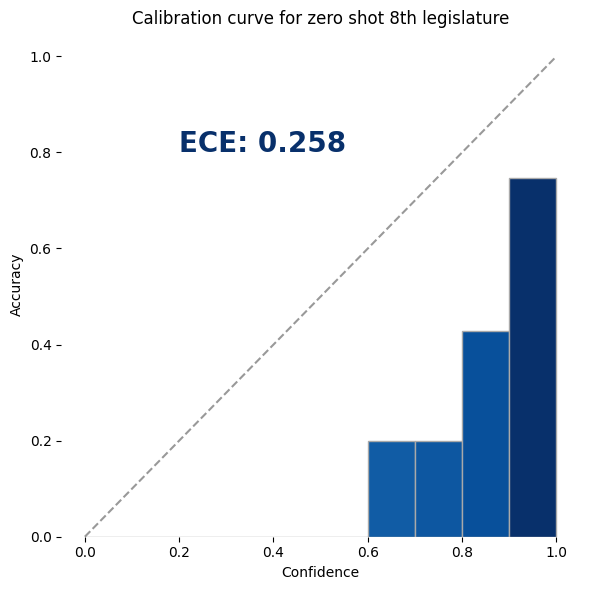

In [18]:
plot_confidence_calibration_curve(RUN_IDS[0], ConfidenceType.Logprobs)

100%|███████████████████████████████████████████████████████████████████████████████| 993/993 [00:00<00:00, 9629.28it/s]


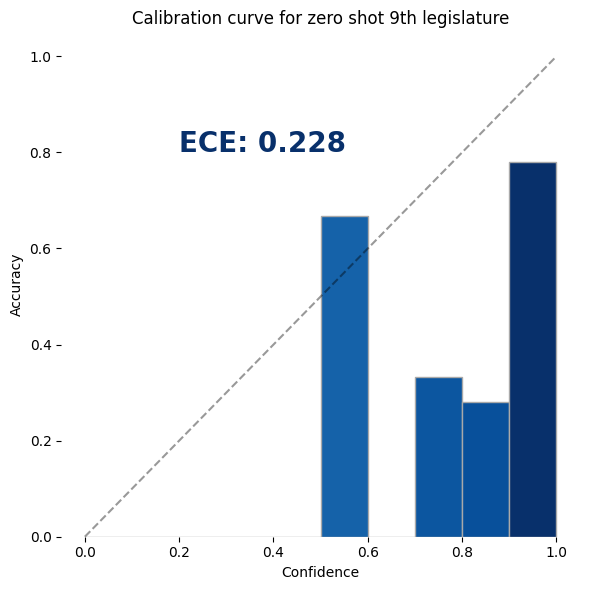

In [19]:
plot_confidence_calibration_curve(RUN_IDS[1], ConfidenceType.Logprobs)

100%|███████████████████████████████████████████████████████████████████████████████| 994/994 [00:00<00:00, 4817.76it/s]


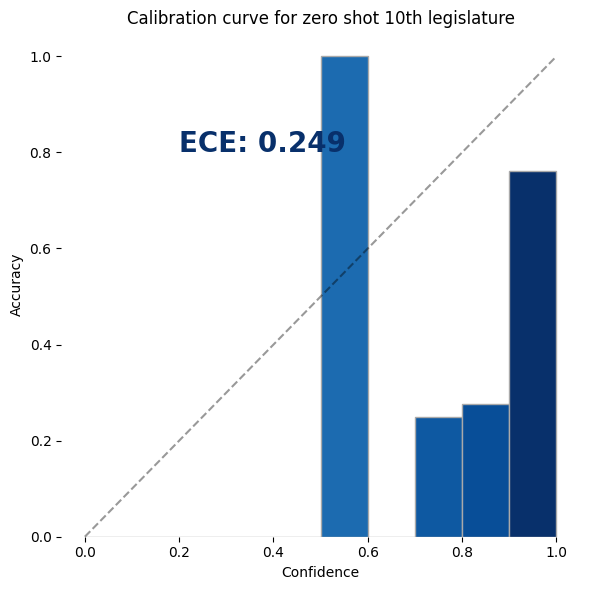

In [20]:
plot_confidence_calibration_curve(RUN_IDS[2], ConfidenceType.Logprobs)

100%|███████████████████████████████████████████████████████████████████████████████| 991/991 [00:00<00:00, 3717.53it/s]


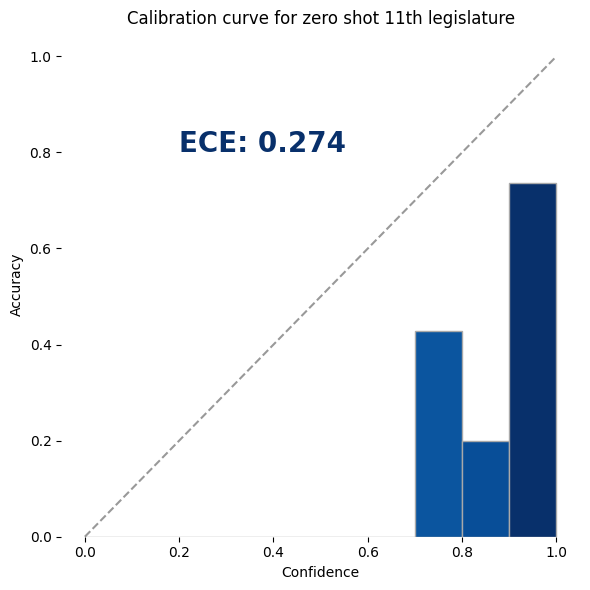

In [21]:
plot_confidence_calibration_curve(RUN_IDS[3], ConfidenceType.Logprobs)

100%|███████████████████████████████████████████████████████████████████████████████| 993/993 [00:00<00:00, 5775.00it/s]


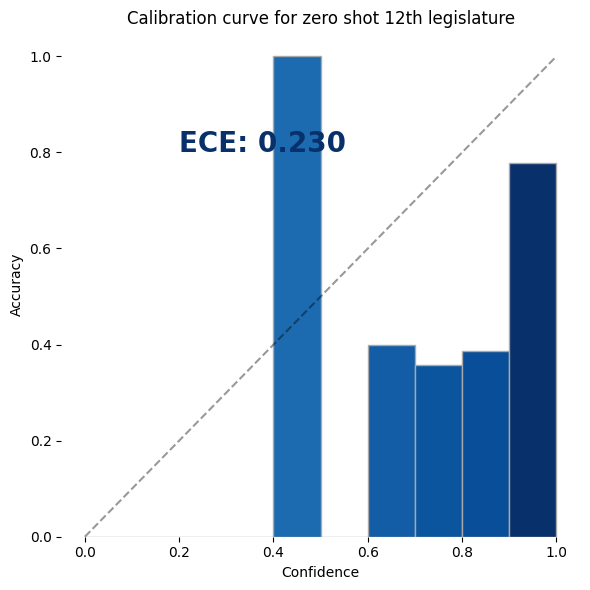

In [22]:
plot_confidence_calibration_curve(RUN_IDS[4], ConfidenceType.Logprobs)

100%|███████████████████████████████████████████████████████████████████████████████| 996/996 [00:00<00:00, 2065.75it/s]


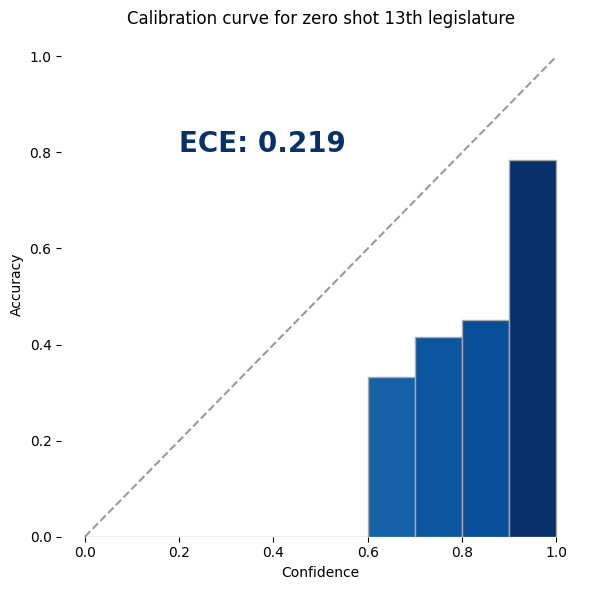

In [23]:
plot_confidence_calibration_curve(RUN_IDS[5], ConfidenceType.Logprobs)

100%|███████████████████████████████████████████████████████████████████████████████| 994/994 [00:00<00:00, 7738.12it/s]


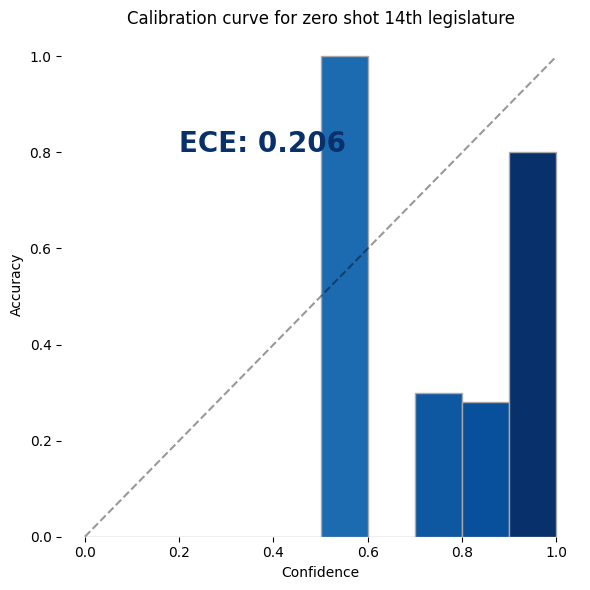

In [24]:
plot_confidence_calibration_curve(RUN_IDS[6], ConfidenceType.Logprobs)

100%|███████████████████████████████████████████████████████████████████████████████| 997/997 [00:00<00:00, 3311.08it/s]


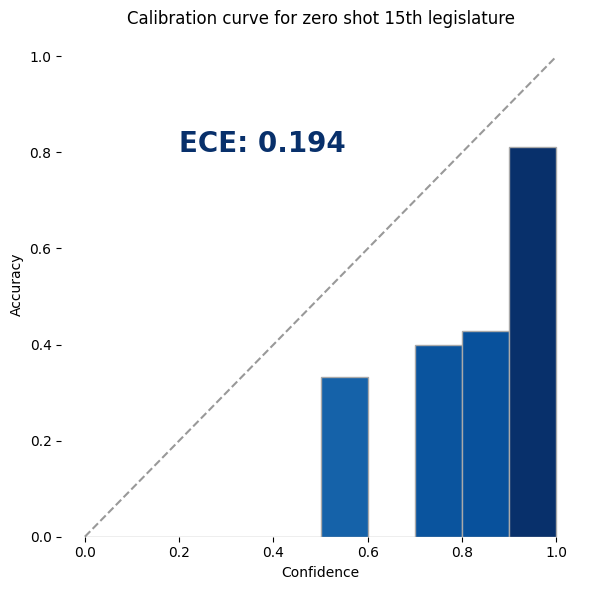

In [25]:
plot_confidence_calibration_curve(RUN_IDS[7], ConfidenceType.Logprobs)

## Summary

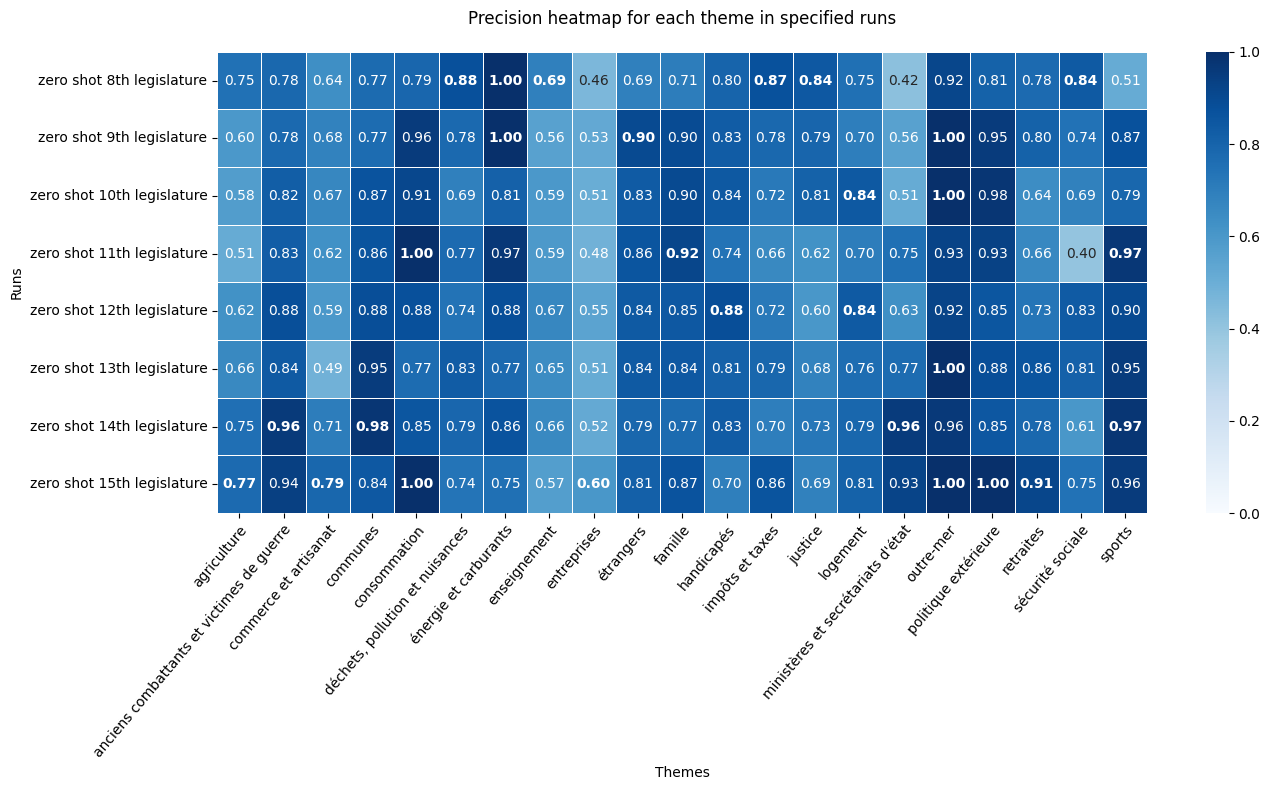

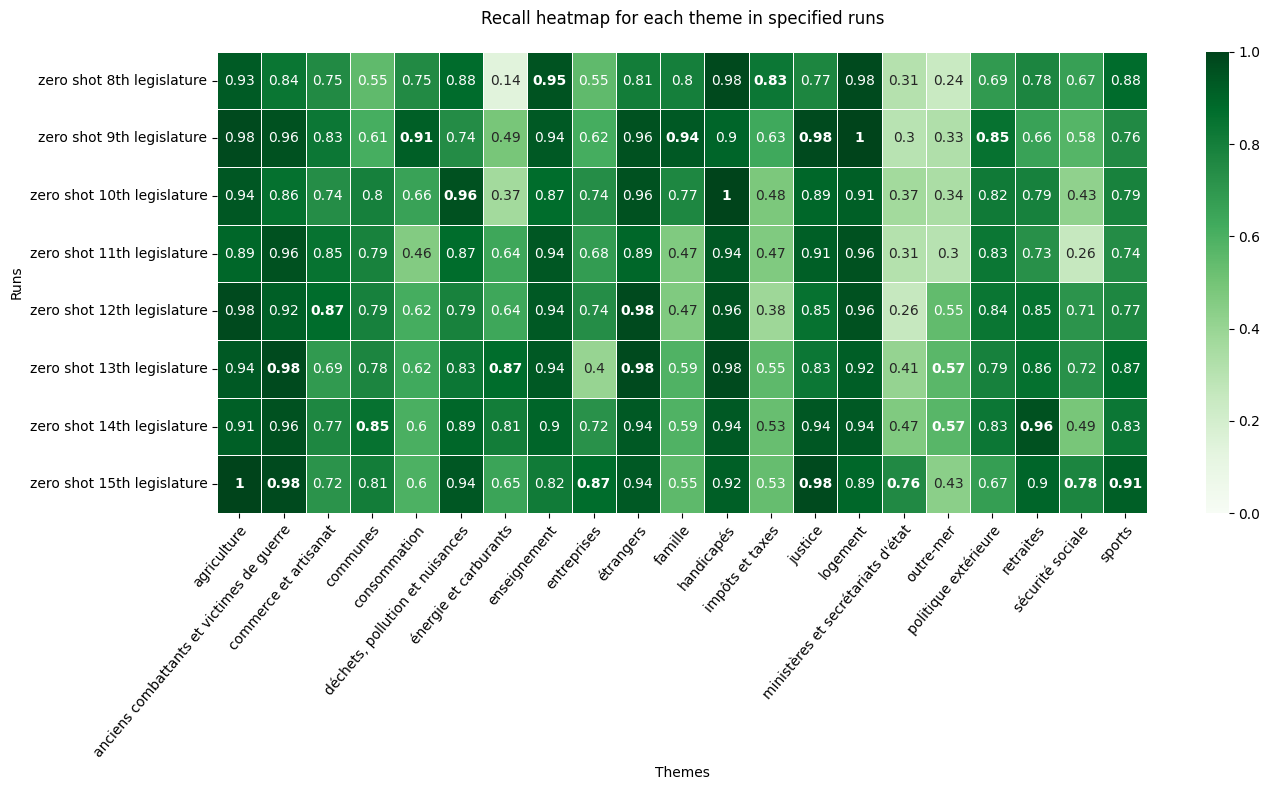

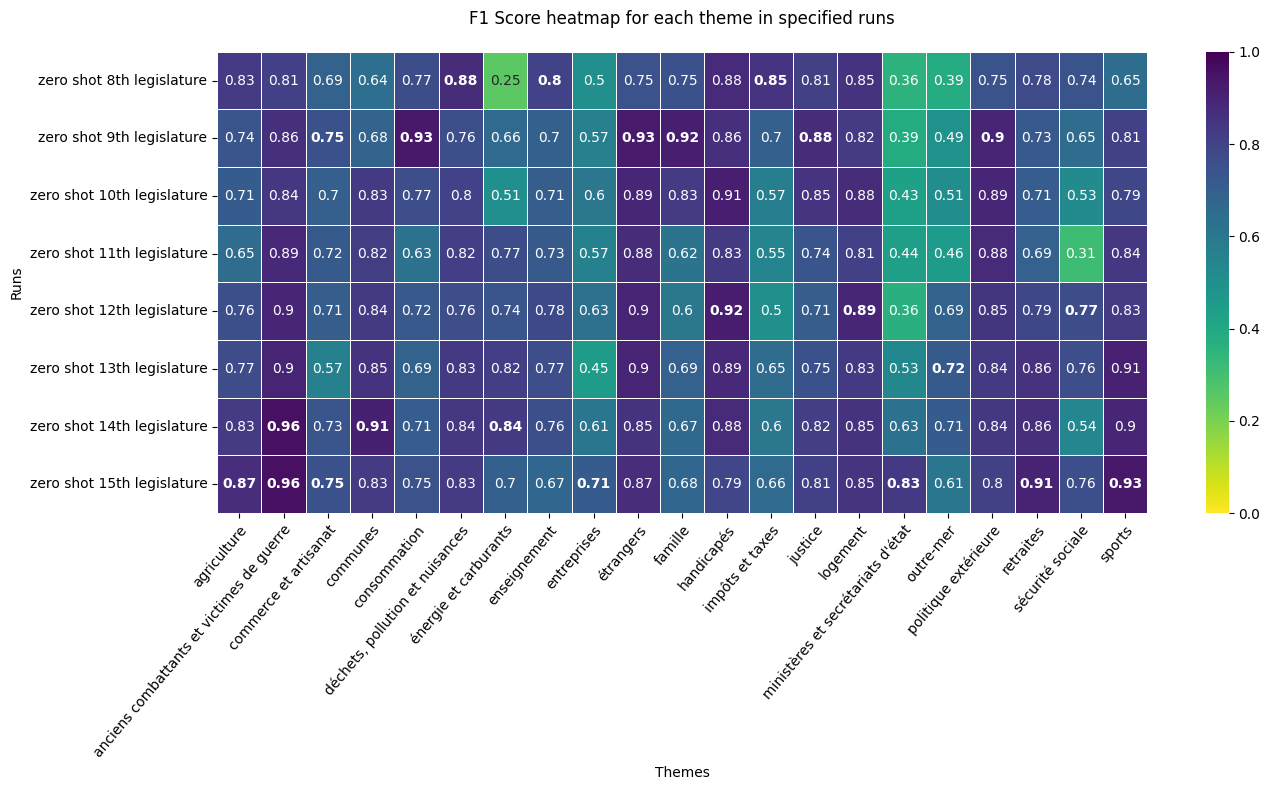

In [31]:
plot_precision_heatmap(RUN_IDS, save_folder=OUTPUT_PATH)
plot_recall_heatmap(RUN_IDS, save_folder=OUTPUT_PATH)
plot_f1_score_heatmap(RUN_IDS, save_folder=OUTPUT_PATH)

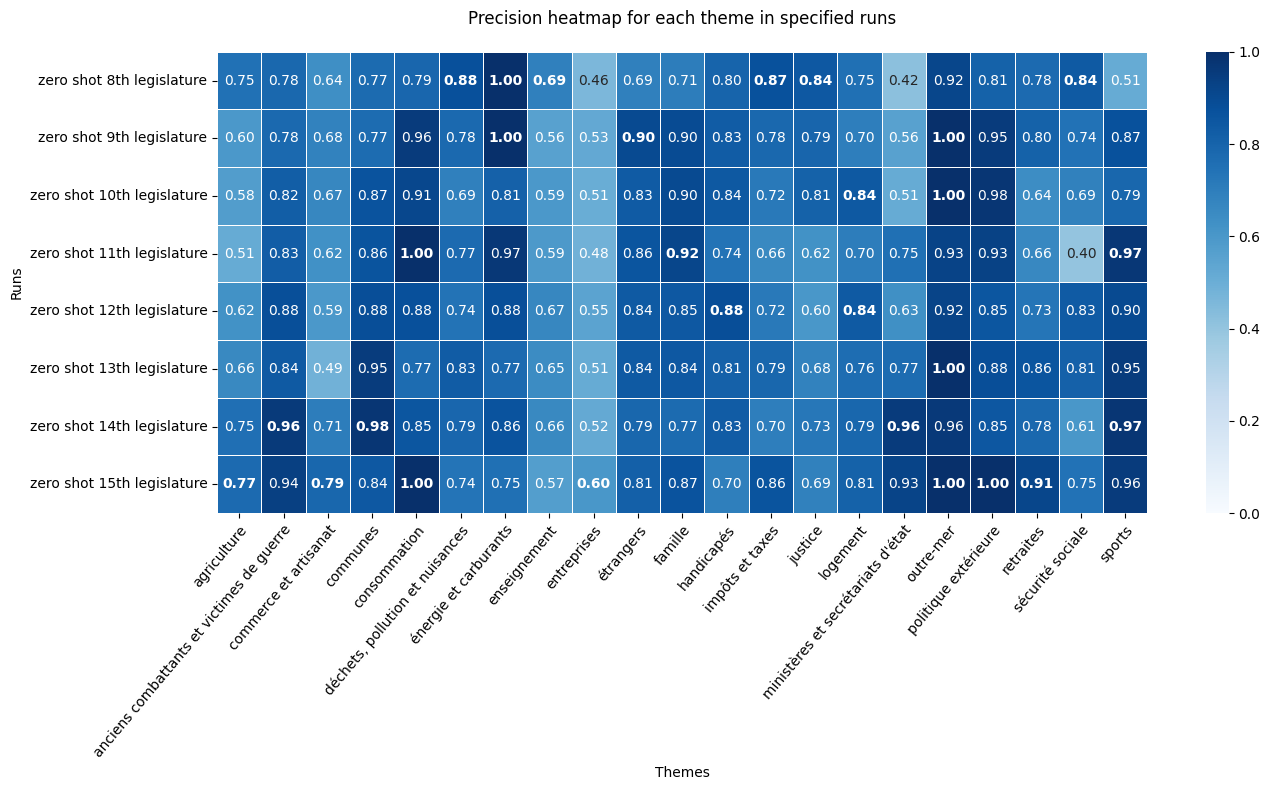

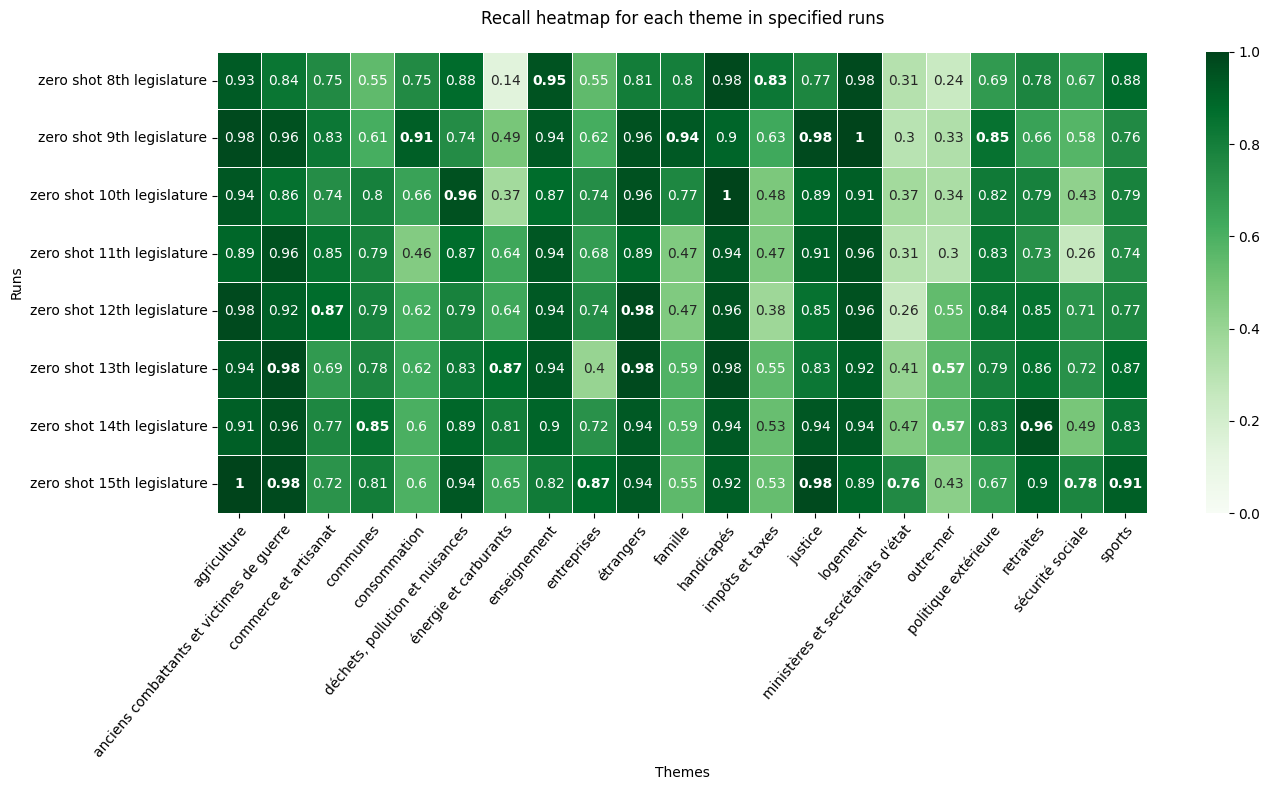

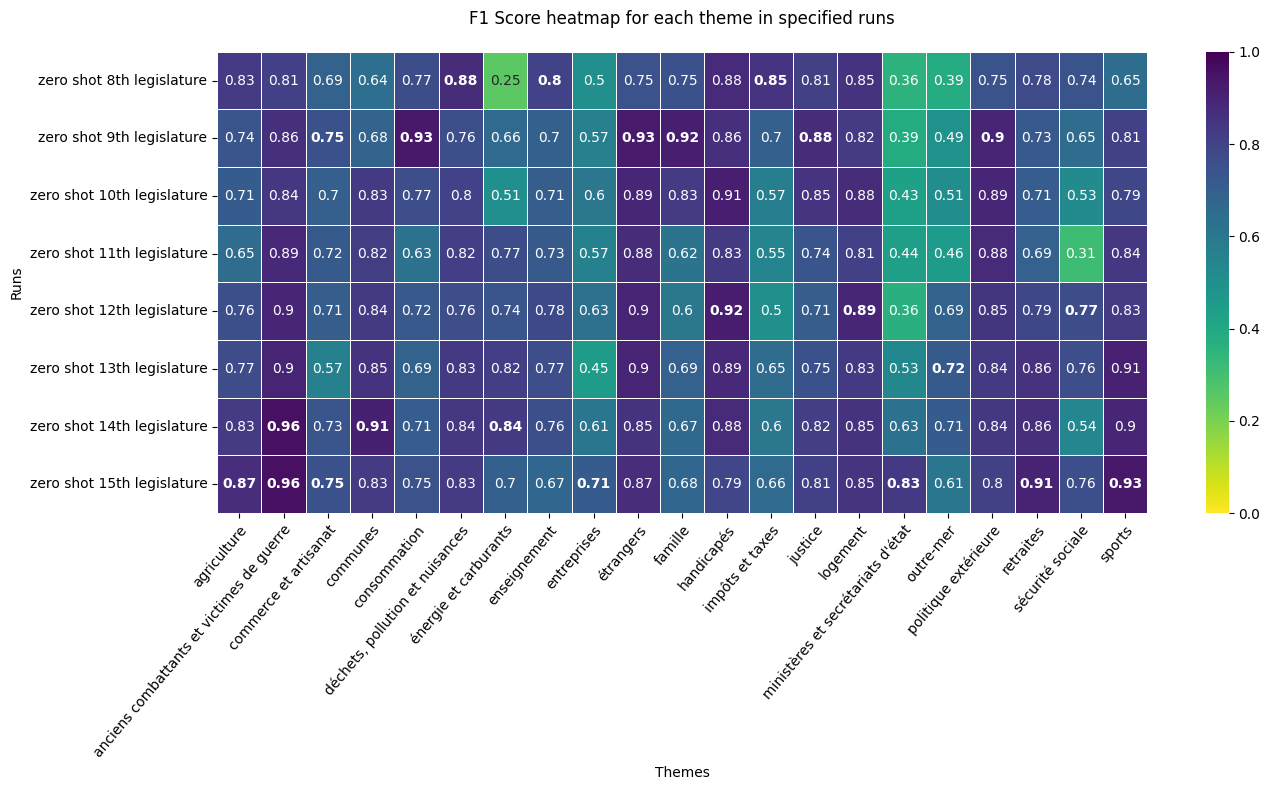

In [32]:
plot_precision_heatmap(RUN_IDS, save_folder=OUTPUT_PATH)
plot_recall_heatmap(RUN_IDS, save_folder=OUTPUT_PATH)
plot_f1_score_heatmap(RUN_IDS, save_folder=OUTPUT_PATH)

### Average performance metrics (Vanilla)

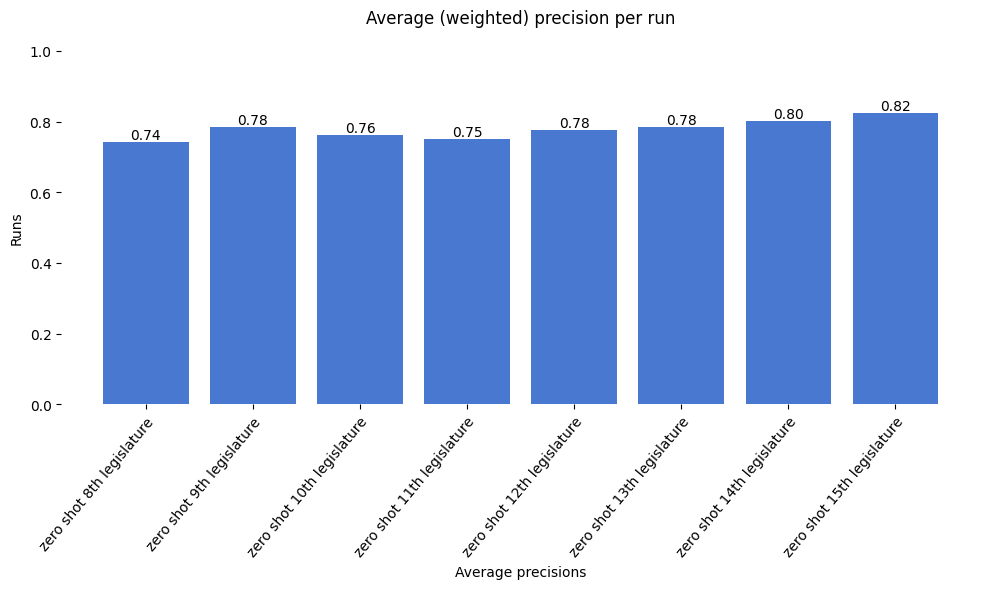

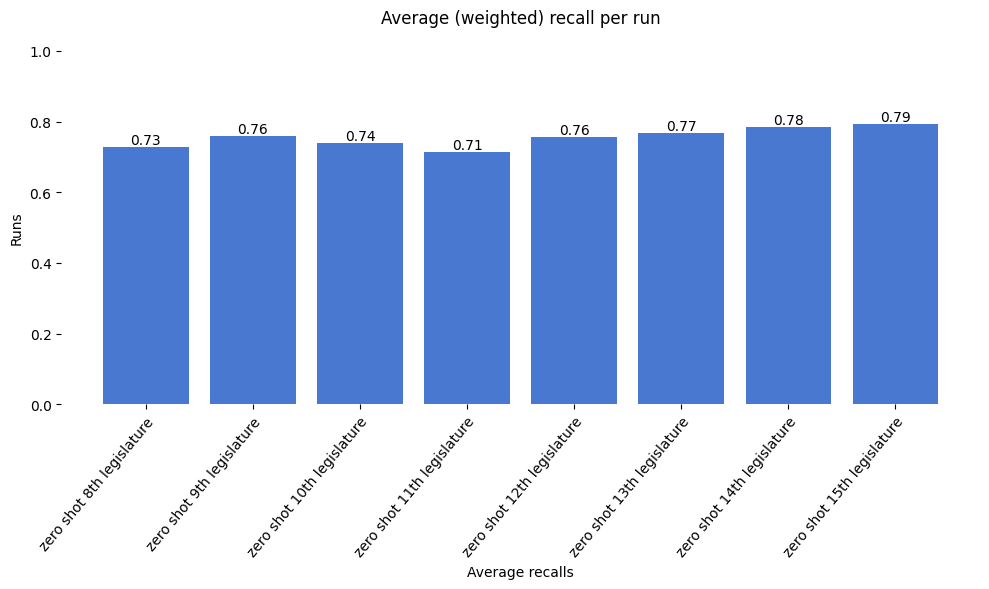

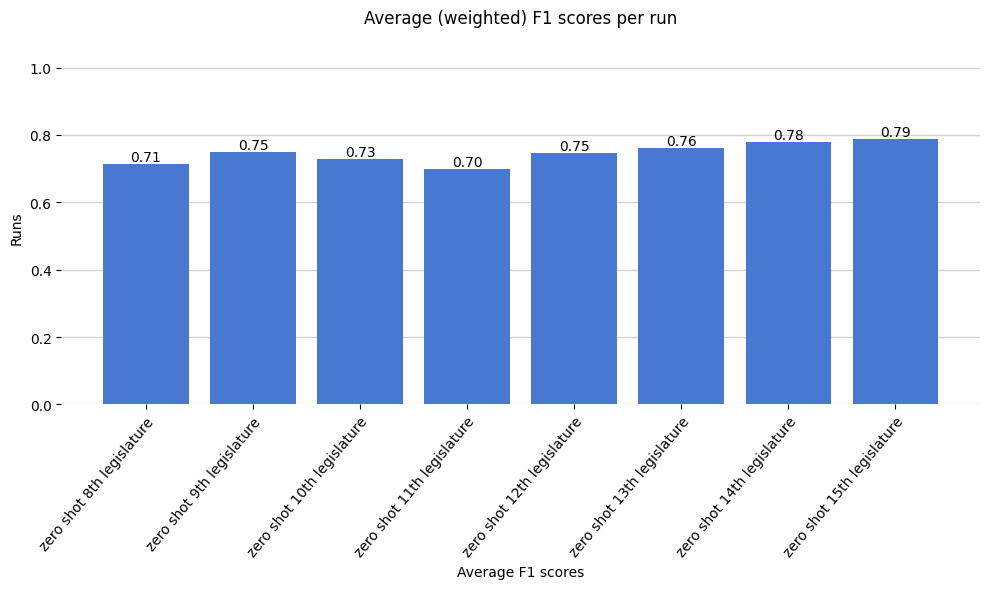

In [28]:
# Weighted
plot_average_precision(RUN_IDS, save_folder=OUTPUT_PATH)
plot_average_recall(RUN_IDS, save_folder=OUTPUT_PATH)
plot_average_f1_score(RUN_IDS, save_folder=OUTPUT_PATH)

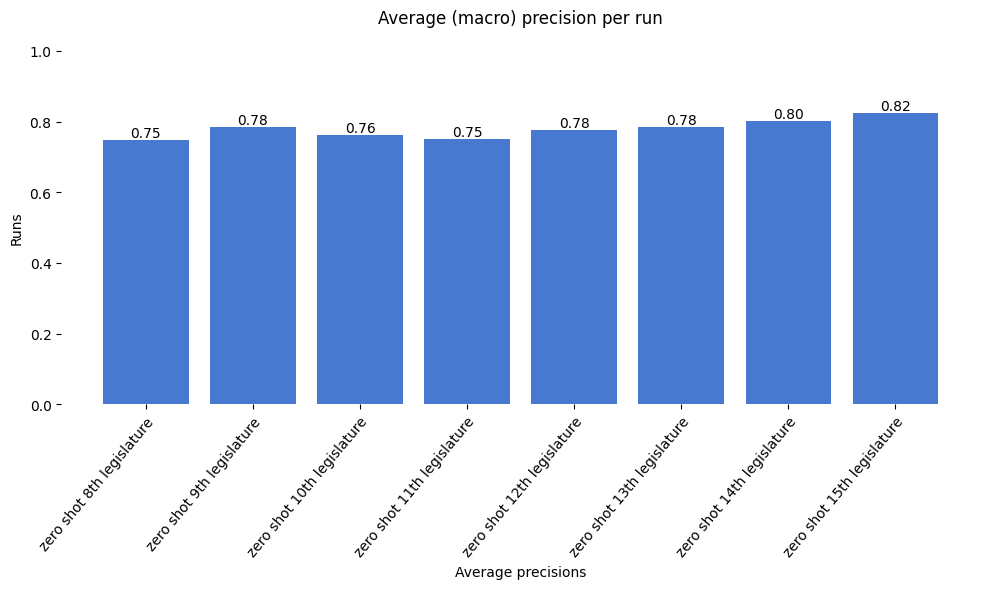

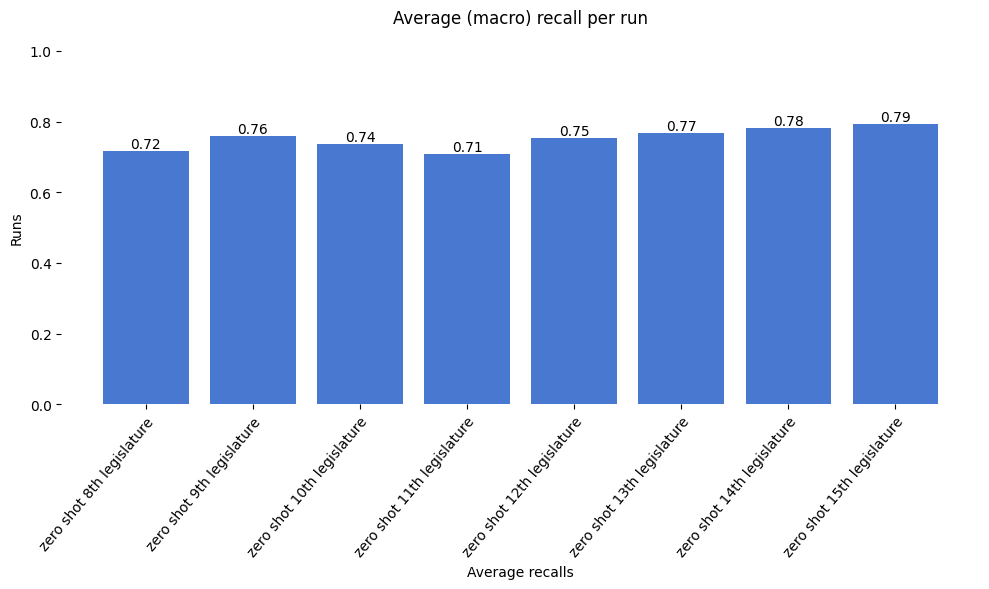

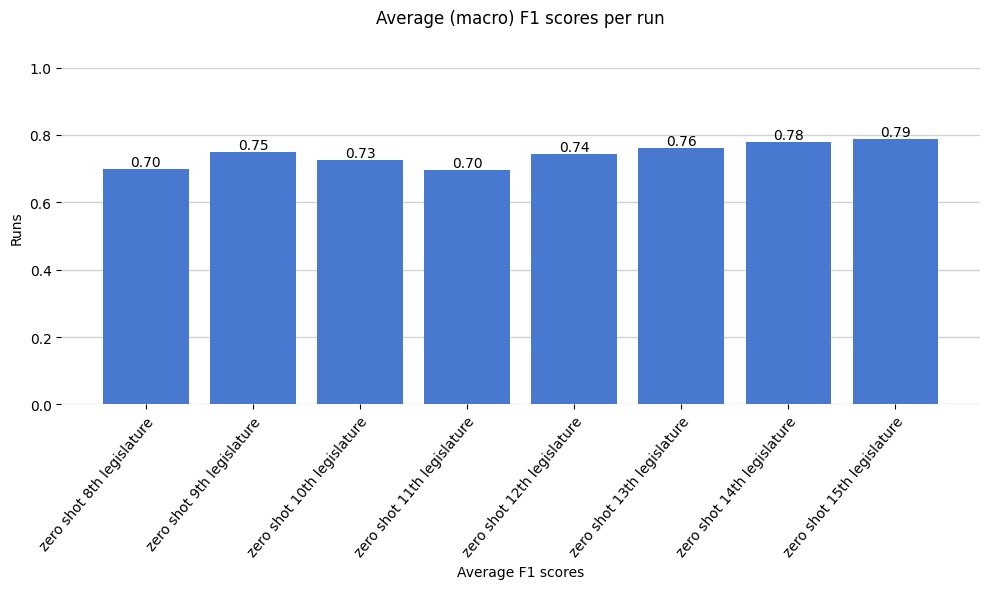

In [29]:
# Macro
plot_average_precision(RUN_IDS, average=AverageMetricEnum.Macro, save_folder=OUTPUT_PATH)
plot_average_recall(RUN_IDS, average=AverageMetricEnum.Macro, save_folder=OUTPUT_PATH)
plot_average_f1_score(RUN_IDS, average=AverageMetricEnum.Macro, save_folder=OUTPUT_PATH)

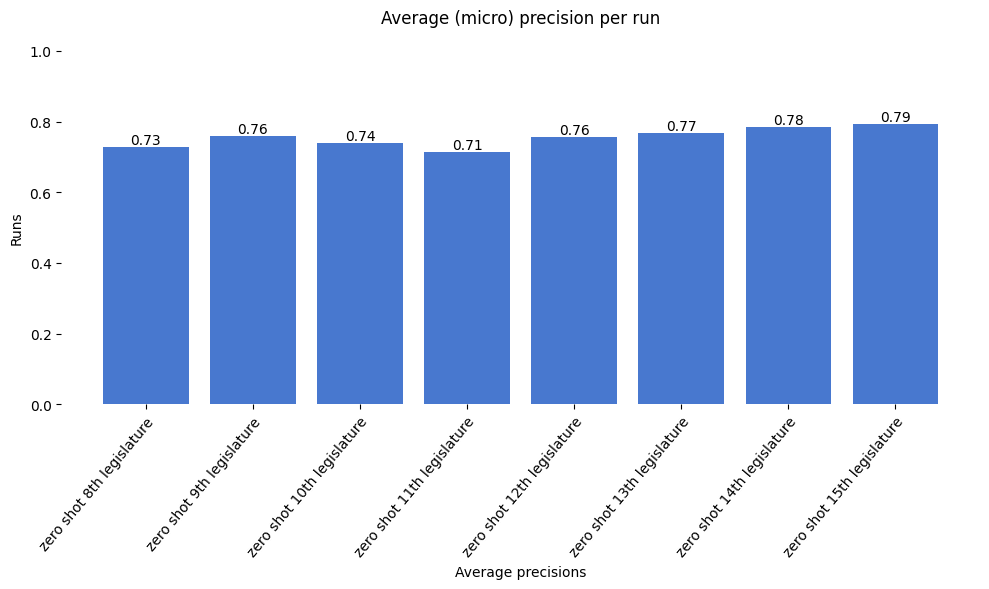

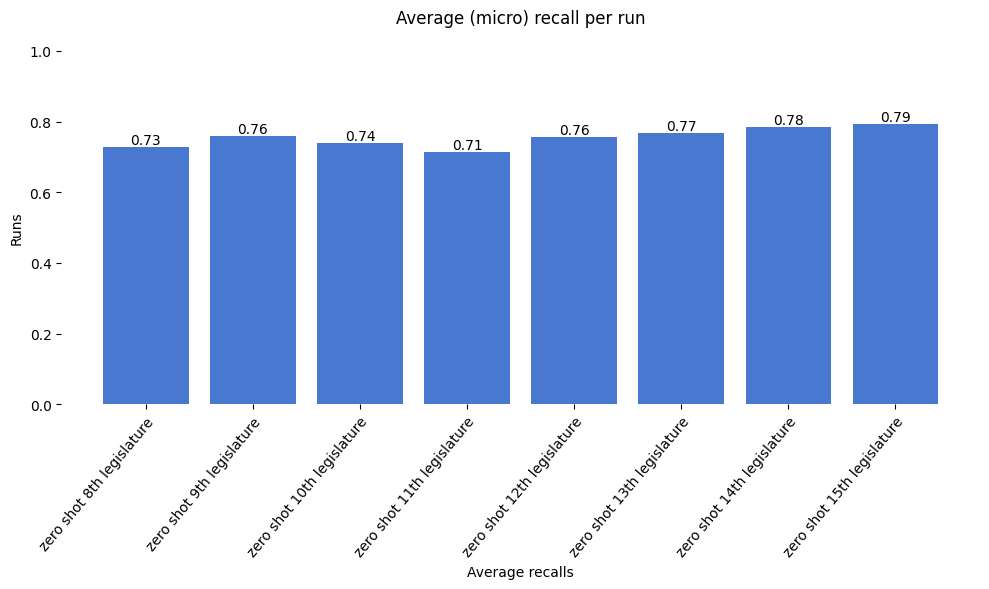

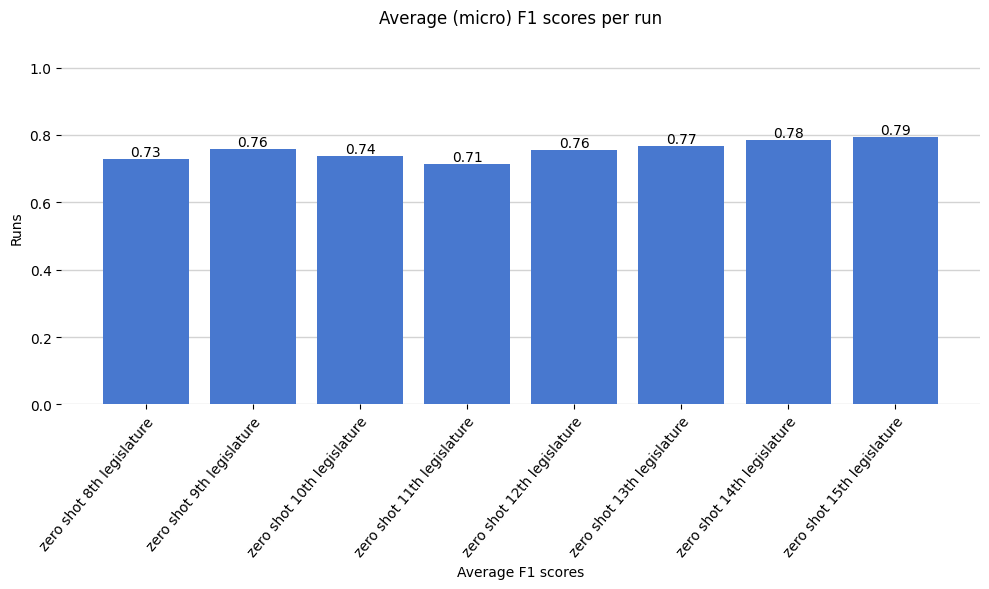

In [30]:
# Micro
plot_average_precision(RUN_IDS, average=AverageMetricEnum.Micro, save_folder=OUTPUT_PATH)
plot_average_recall(RUN_IDS, average=AverageMetricEnum.Micro, save_folder=OUTPUT_PATH)
plot_average_f1_score(RUN_IDS, average=AverageMetricEnum.Micro, save_folder=OUTPUT_PATH)

## Qualitative analysis

In [ ]:
ra = ResultsAnalyzer(RUN_IDS[0])

## Statistical tests

(description)


In [ ]:
P_THRESHOLD = 0.01
all_metrics = get_tests_metrics_dict(RUN_IDS, "precision")
table_test = do_test(all_metrics, "wilcoxon", p_threshold=P_THRESHOLD)

### Wilcoxon for VIII

In [ ]:
table_test[table_test["prompt1"].str.contains("8th legislature")]

### Wilcoxon for IX

In [ ]:
table_test[table_test["prompt1"].str.contains("9th legislature")]

### Wilcoxon for X

In [ ]:
table_test[table_test["prompt1"].str.contains("10th legislature")]

### Wilcoxon for XI

In [ ]:
table_test[table_test["prompt1"].str.contains("11th legislature")]

### Wilcoxon for XII

In [ ]:
table_test[table_test["prompt1"].str.contains("12th legislature")]

### Wilcoxon for XIII

In [ ]:
table_test[table_test["prompt1"].str.contains("13th legislature")]

### Wilcoxon for XIV

In [ ]:
table_test[table_test["prompt1"].str.contains("14th legislature")]